### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading the data

In [2]:
loan_data = pd.read_csv(r"loan.csv")
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

### Data Understanding

In [3]:
loan_data.shape

(39717, 111)

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#checking for NA columns only
na_cols = loan_data.isnull().sum()
len(na_cols[na_cols.values==39717])


54

In [6]:
##checking for NA columns and missing values above 40%
cols = round(loan_data.isnull().mean() * 100 ,0)
len(cols[cols.values>40.0])


57

In [7]:
##list of columns to be dropped that have NA and missing values above 40%
cols_drop=cols[cols.values>40.0]
cols_drop.index

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [8]:
#dropping the columns that are having missing values more than 40%
loan_data.drop(cols[cols.values>40.0].index, axis=1,inplace = True)

In [9]:
loan_data.shape

(39717, 54)

In [10]:
#nunique to check single value columns which can be dropped
unique_columns = loan_data.nunique()
print(unique_columns)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

### Imputing Missing Values

In [11]:
#checking for columns that have missing values and need imputation or could be dropped
missing_data_cols = loan_data.isnull().sum()
missing_data_cols[missing_data_cols.values!=0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
revol_util                       50
last_pymnt_d                     71
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [12]:
loan_data['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [13]:
# missing emp_title imputed using mode as it is a categorical variable and missing value per centage is less
loan_data['emp_title'].mode()[0]

'US Army'

In [14]:
loan_data['emp_title'] = loan_data['emp_title'].fillna('US Army')

In [15]:
loan_data['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [16]:
# missing emp_length imputed using mode as it is a categorical variable and missing value per centage is less
loan_data['emp_length'].mode()[0]

'10+ years'

In [17]:
loan_data['emp_length'] = loan_data['emp_length'].fillna('10+ years')

In [18]:
loan_data['revol_util'].describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [19]:
#removing the % from revol_util 

loan_data.revol_util = loan_data.revol_util.astype(str).apply(lambda x : x.strip('%'))
revol_med = loan_data.revol_util.median()
loan_data.revol_util.fillna(revol_med, axis=0, inplace=True)

In [20]:
loan_data['last_pymnt_d'].describe()

count      39646
unique       101
top       May-16
freq        1256
Name: last_pymnt_d, dtype: object

In [21]:
## only 71 cols are null so we can use ffill method
loan_data['last_pymnt_d'].fillna(method='ffill')

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
5        Jan-15
6        May-16
7        Jan-15
8        Apr-12
9        Nov-12
10       Jun-13
11       Sep-13
12       Jul-12
13       Jan-15
14       Oct-13
15       Jan-15
16       Jan-15
17       May-13
18       Feb-15
19       Jul-12
20       Aug-15
21       Sep-13
22       Jan-15
23       Oct-13
24       Oct-12
25       Sep-12
26       Sep-12
27       Dec-12
28       Apr-13
29       Dec-14
30       Jan-15
31       Aug-13
32       May-16
33       Jan-15
34       Jan-15
35       Jan-15
36       Nov-13
37       Jan-14
38       Apr-14
39       May-16
40       Jan-15
41       Jan-15
42       Jan-15
43       Jan-15
44       Jul-12
45       Jan-15
46       Aug-14
47       Jan-15
48       Jul-12
49       Jan-15
50       Oct-14
51       Jan-15
52       Jan-15
53       Aug-12
54       Jul-14
55       Oct-14
56       Oct-13
57       Jul-13
58       Aug-12
59       Jan-15
60       Jan-16
61       Feb-16
62      

In [22]:
loan_data['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [23]:
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [24]:
loan_data['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [25]:
#dropping the below columns as they are mostly single value cols or donot add value to analysis

drop_cols = ['collections_12_mths_ex_med','member_id','chargeoff_within_12_mths','tax_liens','desc','policy_code', 'delinq_amnt', 'application_type', 'acc_now_delinq', 
'initial_list_status', 'pymnt_plan', 'url','title','earliest_cr_line','total_rec_late_fee','out_prncp','out_prncp_inv','total_rec_late_fee','recoveries','collection_recovery_fee',
'last_credit_pull_d']
loan_data.drop(drop_cols, axis=1,inplace = True)

In [26]:
loan_data.shape

(39717, 34)

### Data Cleaning

In [27]:
#common function for data cleaning
def data_cleansing(dataframe, column, stripvalue, func = 'strip'):
    if func == 'strip':
        data = dataframe[column].astype(str).apply(lambda x : x.strip(stripvalue))
    elif func == 'replace':
        data = dataframe[column].astype(str).apply(lambda x : x.replace(stripvalue, ""))
    return data

In [28]:
#common function for missing value treatment
def missing_values(data, percentage = False):
    if percentage == True:
        null_cols = round(data.isna().sum() * 100 / len(data), 0)
        print(null_cols)
        return 
    else:
        missing_values = data.isna().sum()
        return missing_values[missing_values.values > 0]
#common function for changing data type   
def change_data_type(dataframe, column, datatype):
    print(f'Previous dtype for {column}: {dataframe[column].dtype}')
    dataframe[column] = dataframe[column].astype(datatype)
    print(f'New dtype for {column}: {dataframe[column].dtype}')
    return

In [29]:
#cleansing some of the columns
loan_data["term"] = data_cleansing(loan_data, 'term', 'months')

In [30]:
loan_data["term"].value_counts()

 36     29096
 60     10621
Name: term, dtype: int64

In [31]:
#removing % from int_rate column and revol_util
loan_data["int_rate"] = data_cleansing(loan_data, 'int_rate', '%')
loan_data["revol_util"] = data_cleansing(loan_data, 'revol_util', '%')

In [32]:
loan_data["emp_length"] = data_cleansing(loan_data, 'emp_length', 'years')
loan_data["emp_length"] = data_cleansing(loan_data, 'emp_length', '<')
loan_data["emp_length"] = data_cleansing(loan_data, 'emp_length', '+', 'replace')

In [33]:
#changing the data type of below cols from object to int or float as these are numeric cols
change_data_type(loan_data,'term', 'int64')
change_data_type(loan_data,'int_rate', 'float64')
change_data_type(loan_data,'emp_length', 'int64')
change_data_type(loan_data,'revol_util', 'float64')

Previous dtype for term: object
New dtype for term: int64
Previous dtype for int_rate: object
New dtype for int_rate: float64
Previous dtype for emp_length: object
New dtype for emp_length: int64
Previous dtype for revol_util: object
New dtype for revol_util: float64


### Derived Metrics:

In [34]:
#getting type driven metrics from issue_d column as loan_issue_month and loan_issue_year
loan_month_year = loan_data['issue_d'].str.partition("-", True)
loan_data['loan_issue_month']=loan_month_year[0]                       
loan_data['loan_issue_year']='20' + loan_month_year[2]

In [35]:
loan_data['loan_issue_month'].describe()
loan_data['loan_issue_year'].describe()

count     39717
unique        5
top        2011
freq      21656
Name: loan_issue_year, dtype: object

In [36]:
#getting zip_region as a derived metric from zip_code which will be used further in bivariate analysis
loan_data['zip_region'] = loan_data.loc[:, 'zip_code'].apply(lambda x : x[:1])
loan_data.zip_region.describe()

count     39717
unique       10
top           9
freq       8644
Name: zip_region, dtype: object

### Outlier Check

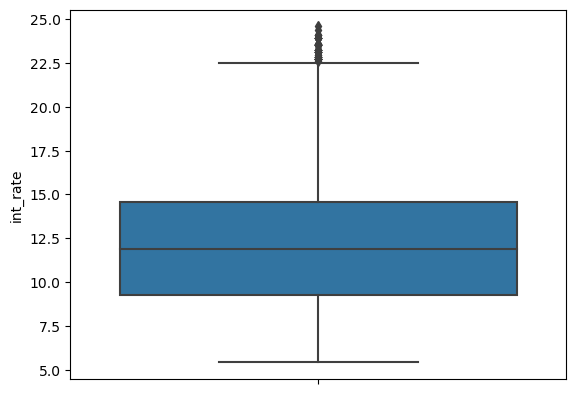

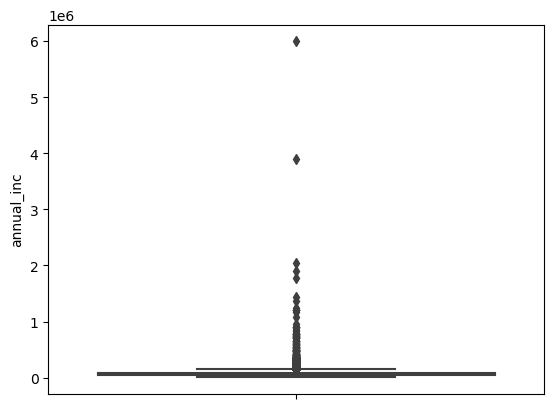

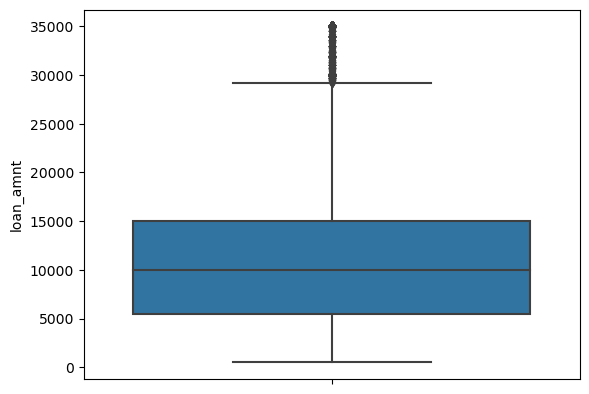

In [37]:
outlier_check = ["int_rate","annual_inc","loan_amnt"]
for col in outlier_check:
    sns.boxplot(y=loan_data[col])
    plt.show()



Outliers are found in loan_amnt, annual_income and int_rate. However we will be removing the outliers for annual_income as some of the outliers above 95 percentile is largely disconnected from the actual data distribution.we can take quantile info above median to understand better the data.

In [38]:
quantile_info = loan_data["annual_inc"].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.00
0.75     82300.00
0.90    116000.00
0.95    142000.00
0.97    165757.92
0.98    187000.00
0.99    234999.36
Name: annual_inc, dtype: float64

In [39]:
# we can see that after 95 percentile the values are totally disconnected from the distribution. 
#So removing the outliers above 95 percentile

outlier_data = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data['annual_inc'] <= outlier_data]
loan_data.shape

(37743, 37)

### EDA - Univariate Analysis

In [40]:
loan_data['loan_status'].value_counts()

Fully Paid     31268
Charged Off     5421
Current         1054
Name: loan_status, dtype: int64

In [41]:
# common functions to create univariate analysis visualization for numerical and categorical variables

def univariate_numerical(var, title):
    plt.figure(figsize=(12,4))
#Setting subplot index
    plt.subplot(1,2,1)
#Histogram plot
    sns.histplot(var)
    plt.subplot(1,2,2)
#Box plot
    sns.boxplot(var)
#Single title for both subplots.
    plt.suptitle(title)
    plt.show()
    
    

def univariate_categorical(var, title):
    plt.title(title)
    sns.countplot(x=var)
    plt.show()

### Numerical Variables:

### Loan Amount

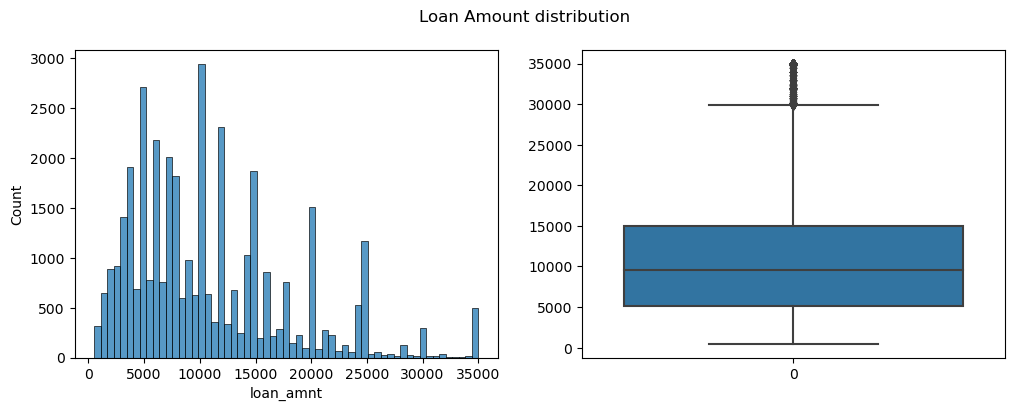

In [42]:
univariate_numerical(loan_data["loan_amnt"],"Loan Amount distribution")

In [43]:
loan_data['loan_amnt'].describe()

count    37743.000000
mean     10847.490925
std       7156.268085
min        500.000000
25%       5075.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Observation :

According to the above plots, it can be observed that more number of people took loan amount of 10000, 
and also median is 10000. And very few people took a loan amount of more than 30000


### Funded_Amnt

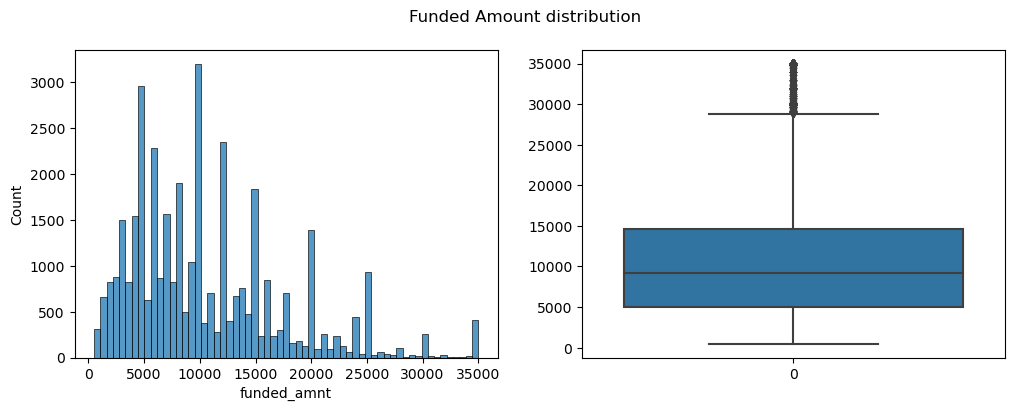

In [44]:
univariate_numerical(loan_data["funded_amnt"],"Funded Amount distribution")

In [45]:
loan_data['funded_amnt'].describe()

count    37743.000000
mean     10593.457065
std       6898.086728
min        500.000000
25%       5000.000000
50%       9250.000000
75%      14575.000000
max      35000.000000
Name: funded_amnt, dtype: float64

### Observation:

Funded amount data behavior is similar to loan Amount, from which we can tell that Lending club approved most of applied loan amount.

### Interest Rate

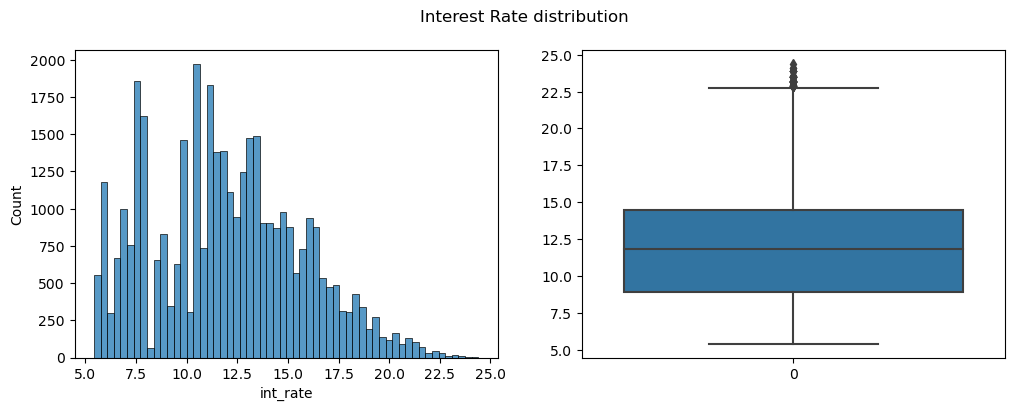

In [46]:
univariate_numerical(loan_data["int_rate"],"Interest Rate distribution")

In [47]:
loan_data['int_rate'].describe()

count    37743.000000
mean        11.972018
std          3.697599
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

### Observation:

Interest rate mostly lies in the range of 9%-14.5%. There are very few people who took loan at higher interest rate of 22.5%

### Installment

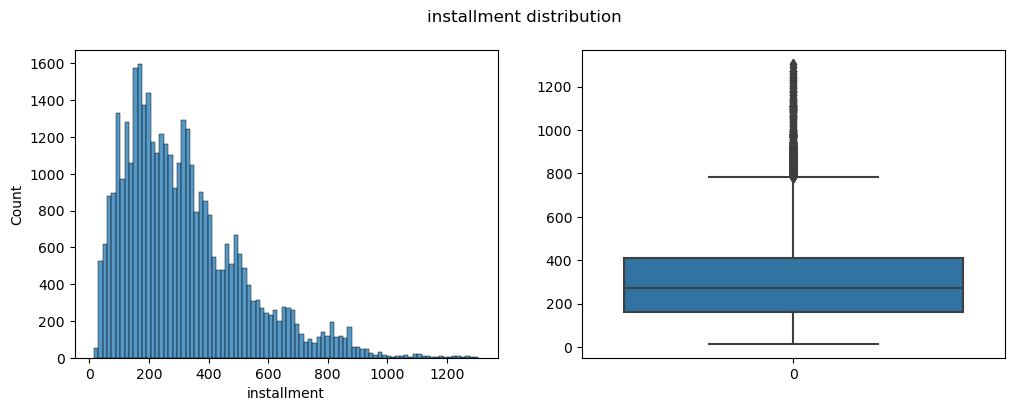

In [48]:
univariate_numerical(loan_data["installment"],"installment distribution")

In [49]:
loan_data['installment'].describe()

count    37743.000000
mean       313.919193
std        199.548080
min         15.690000
25%        163.960000
50%        273.100000
75%        412.150000
max       1305.190000
Name: installment, dtype: float64

### Observation:

Most installments are between 200 - 400 and since there are outliers therefore we can use the median value of 280 to represent the most common installment

### Annual Income

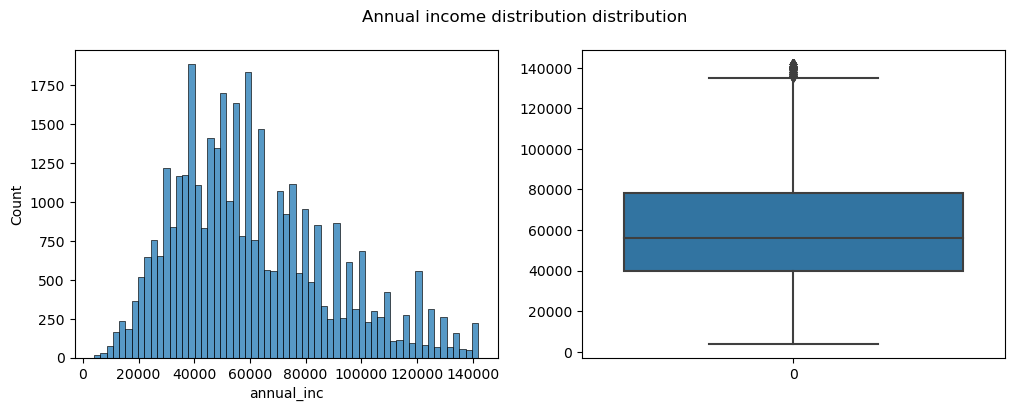

In [50]:
plt.rcParams["axes.formatter.limits"] = (-99, 99) #to disable sci notation

univariate_numerical(loan_data["annual_inc"],"Annual income distribution distribution")


### Observation:

Outliers above 95 quantile were removed therefore the distribution looks proper for annual income now



### Dti

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. Debt to income ratio


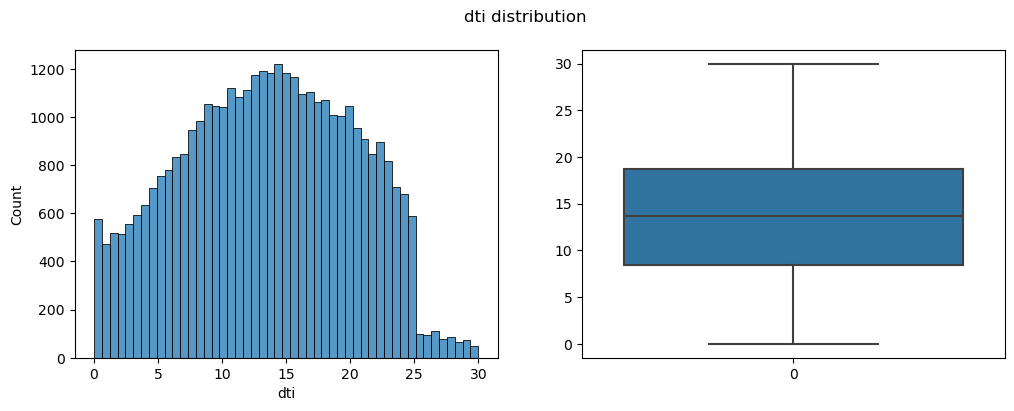

In [51]:
univariate_numerical(loan_data["dti"],"dti distribution")

In [52]:
loan_data['dti'].describe()

count    37743.000000
mean        13.490405
std          6.668443
min          0.000000
25%          8.395000
50%         13.630000
75%         18.760000
max         29.990000
Name: dti, dtype: float64

### Observation

No outliers and normal distribution is seen where debt to income ratio is less than 30

### Employment length

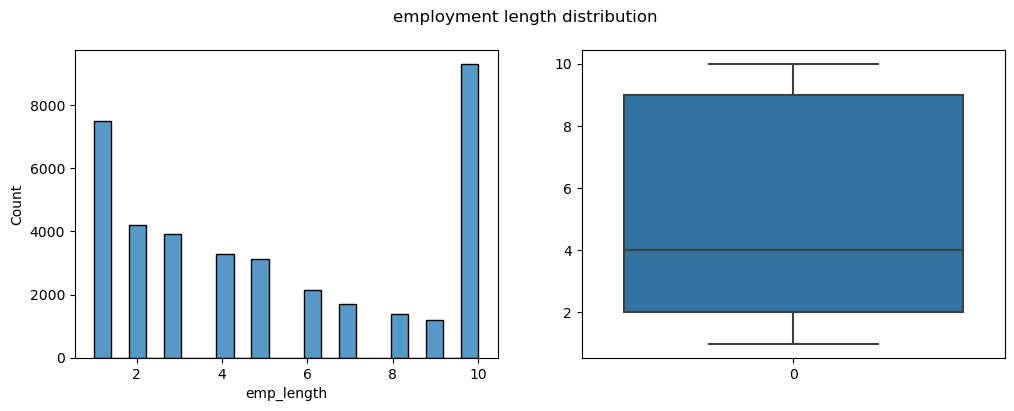

In [53]:
univariate_numerical(loan_data["emp_length"],"employment length distribution")

### Observations
Most borrowers have 10 years or more years of employment

### Categorical Variables

### Grade

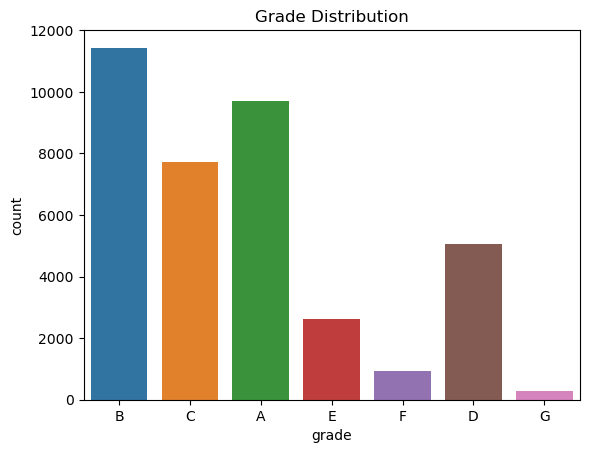

In [54]:
univariate_categorical(loan_data["grade"],"Grade Distribution")

### SubGrade

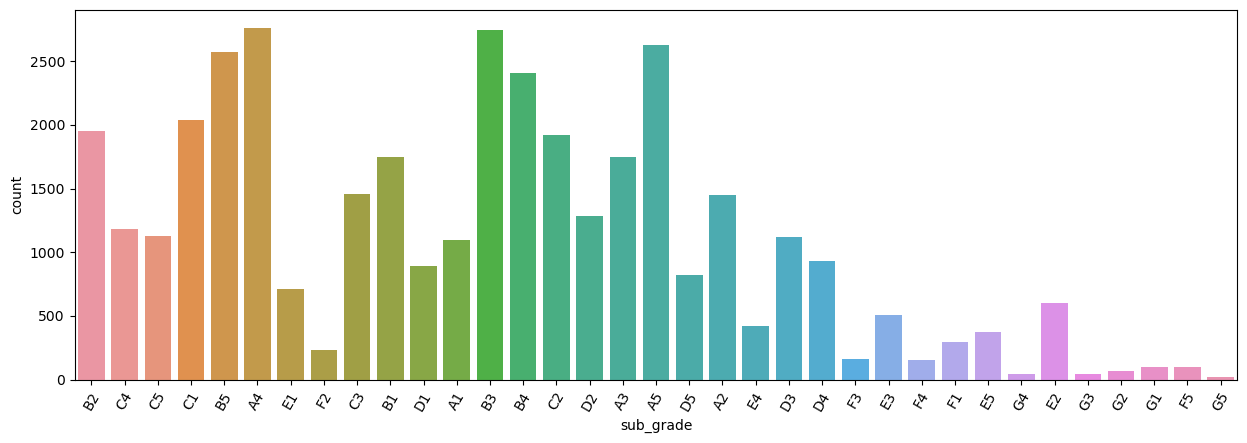

In [55]:
#plt.title('Subgrade Distribution')
plt.figure().set_figwidth(15)
sns.countplot(x=loan_data["sub_grade"])
plt.xticks(rotation = 60)
plt.show()


### Home Ownership

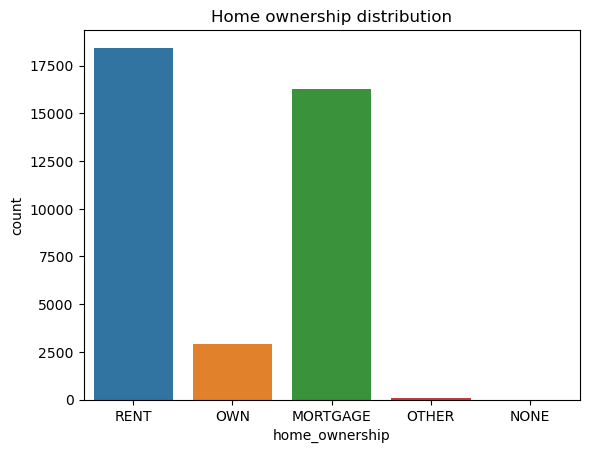

In [56]:
univariate_categorical(loan_data["home_ownership"],"Home ownership distribution")

### Loan Status

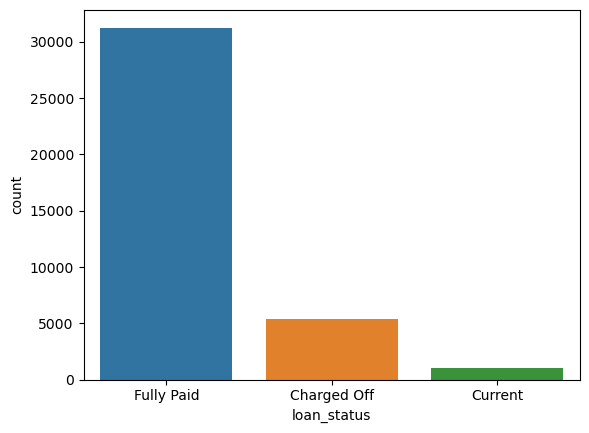

In [57]:
univariate_categorical(loan_data["loan_status"],"")

### Verification Status

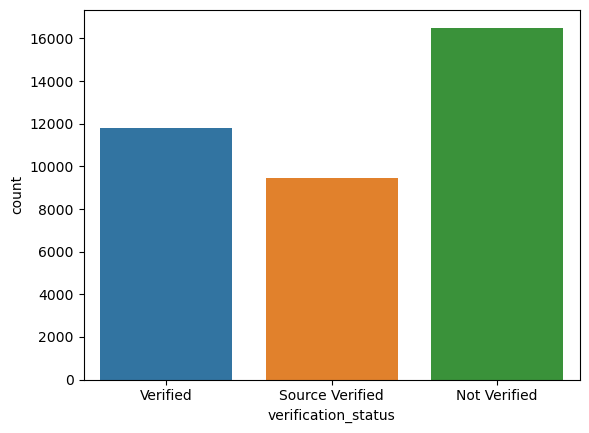

In [58]:
univariate_categorical(loan_data["verification_status"],"")

### Purpose

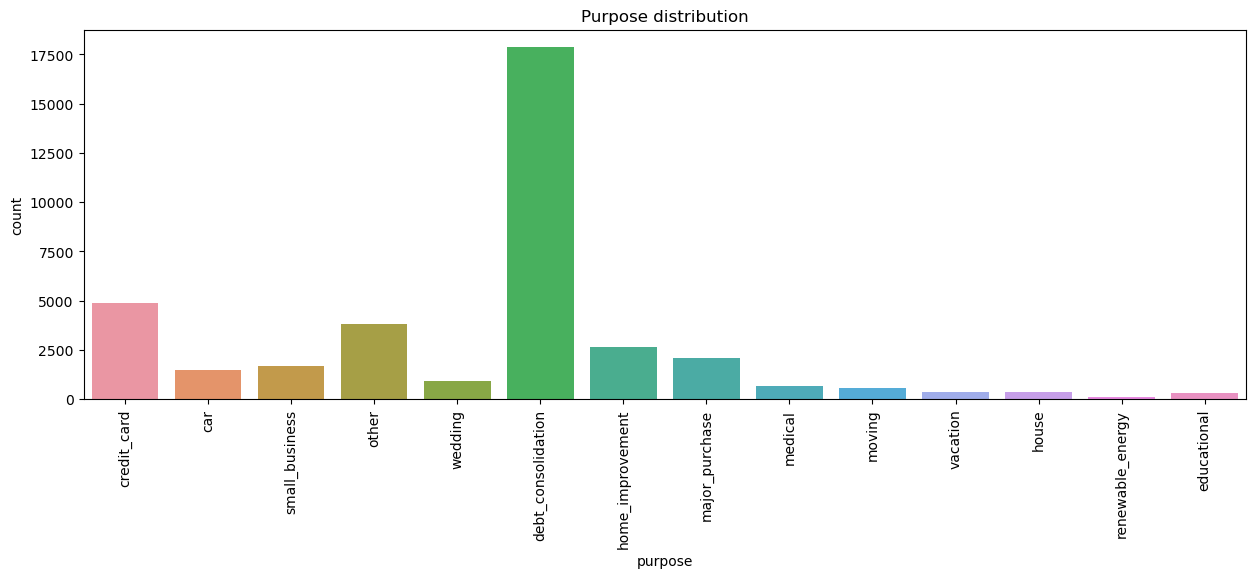

In [59]:
plt.figure().set_figwidth(15)
sns.countplot(x=loan_data["purpose"])
plt.title("Purpose distribution")
plt.xticks(rotation=90)
plt.show()

### Loan Issue Year and Month

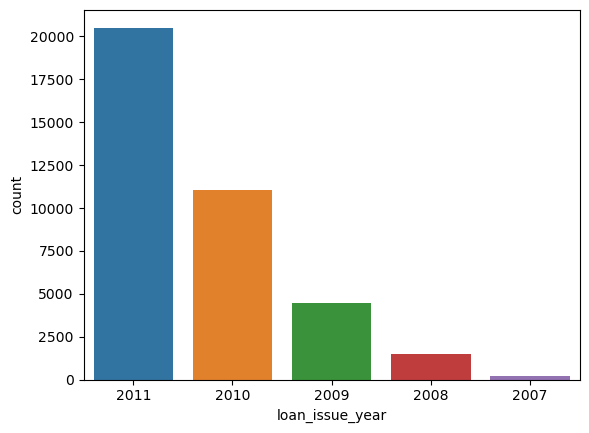

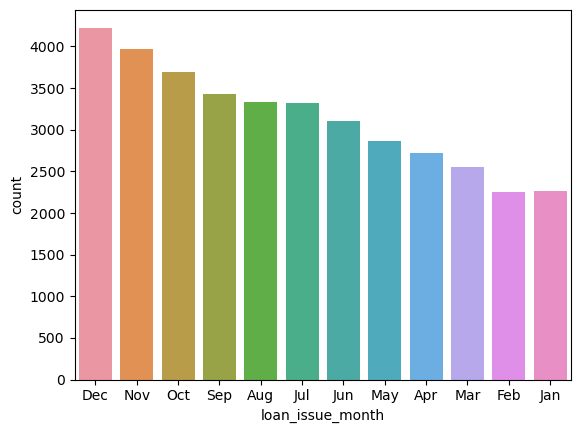

In [60]:

univariate_categorical(loan_data["loan_issue_year"],"")
univariate_categorical(loan_data["loan_issue_month"],"")

### Observations:

The loan issue every year has almost doubled <br/>
There are more loan issues in last 3 months every end of the year i.e., Oct, Nov and Dec

### Term

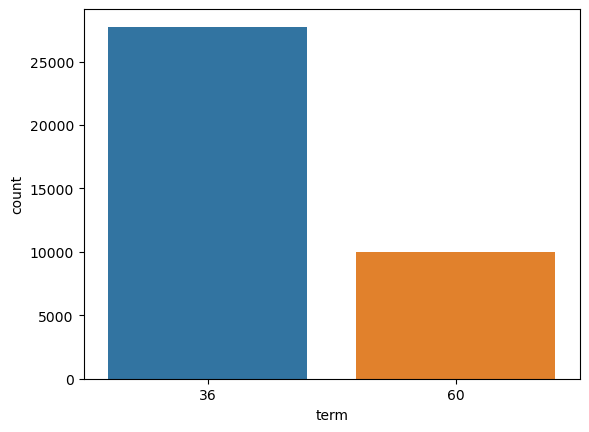

In [61]:

univariate_categorical(loan_data["term"],"")

### pub_rec

Number of public derogatory records

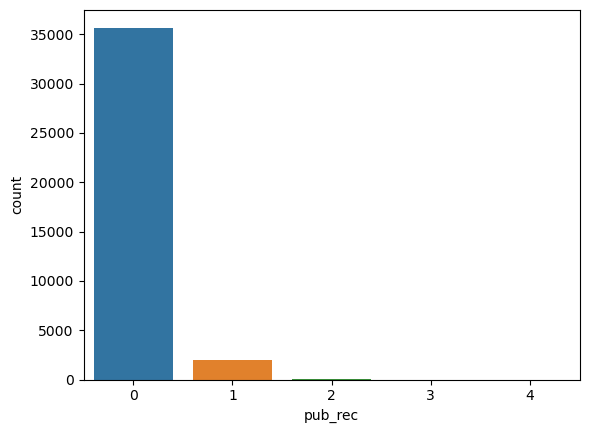

In [62]:
univariate_categorical(loan_data["pub_rec"],"")

### Observations:

Most of the public donot have any public derogatory records

### pub_rec_bankruptcies
Number of public record bankruptcies

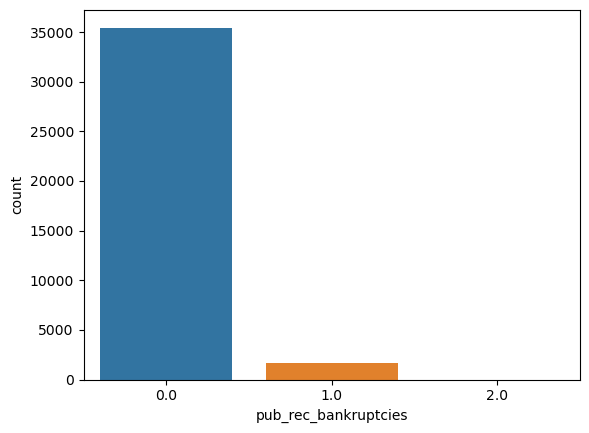

In [63]:
univariate_categorical(loan_data["pub_rec_bankruptcies"],"")

### Observations
Most of the borrowers are not bankrupt

## Segmented Univariate Analysis

In [64]:
#common function for segmented analysis using boxplot
def segmented_analysis(x, y, title):
    sns.boxplot(x=x, y=y)
    plt.title(title)
    plt.show()

### Int_rate

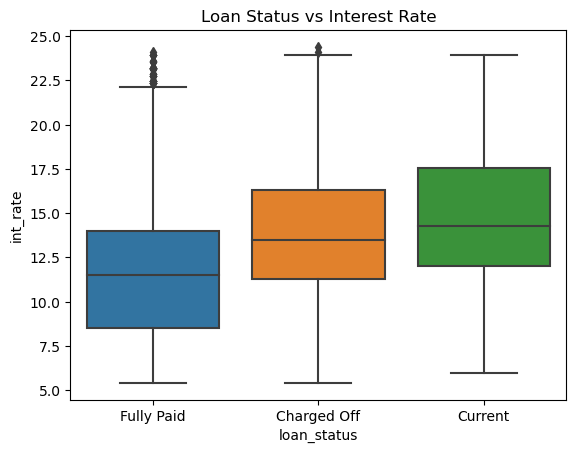

In [65]:
segmented_analysis(loan_data['loan_status'],loan_data['int_rate'],'Loan Status vs Interest Rate')

### Observation:
Greater the interest rate more is the chance of defaulting the loan

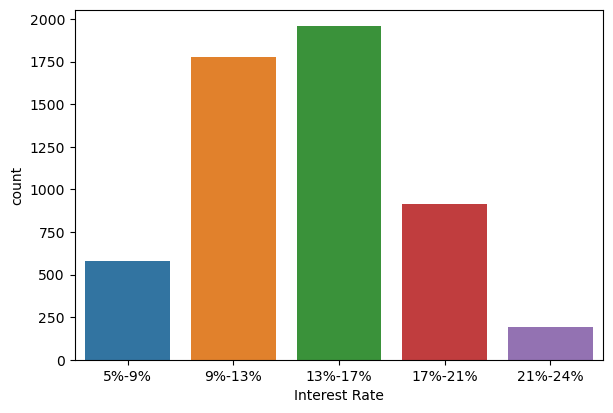

In [66]:
#creating segments for interest rate groups
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.show()

Most of the borrowers lie in the interest range of 13-17% who are the defaulters

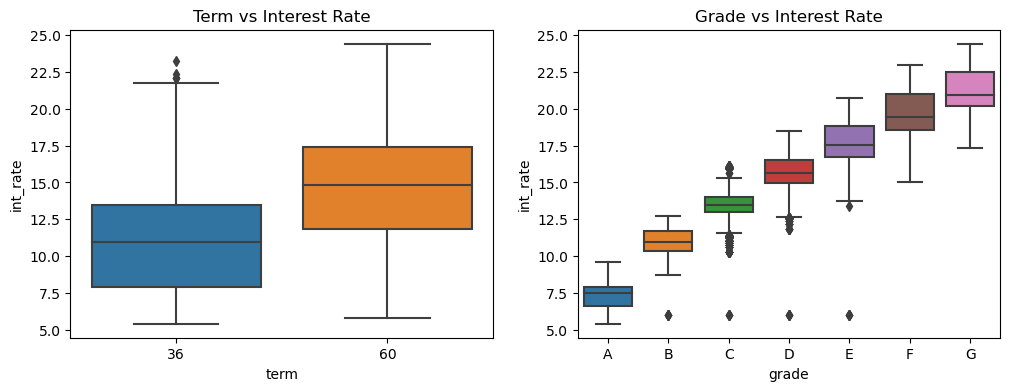

In [67]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['term'], y=loan_data['int_rate'])
plt.title('Term vs Interest Rate')
plt.subplot(1,2,2)
ordergrd = loan_data['grade'].unique()
ordergrd.sort()
sns.boxplot(x=loan_data['grade'], y=loan_data['int_rate'],order = ordergrd)
plt.title('Grade vs Interest Rate')
plt.show()



### Observation
Interest rate is higher for higher term loans </br>
The interest rate is lower for grade A loan and highest for grade G. It means interest rate increases as grade lowers

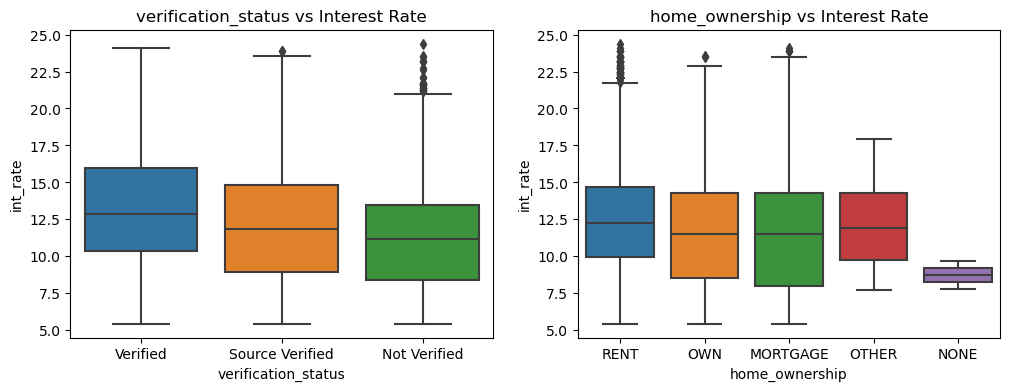

In [68]:
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['verification_status'], y=loan_data['int_rate'])
plt.title('verification_status vs Interest Rate')
plt.subplot(1,2,2)
sns.boxplot(x=loan_data['home_ownership'], y=loan_data['int_rate'])
plt.title('home_ownership vs Interest Rate')
plt.show()


### Observation
People with rents are given loan at higher interest rate and thus they are likely to default the loan </br>
Non verified loan applicants got loan at lower interest than others


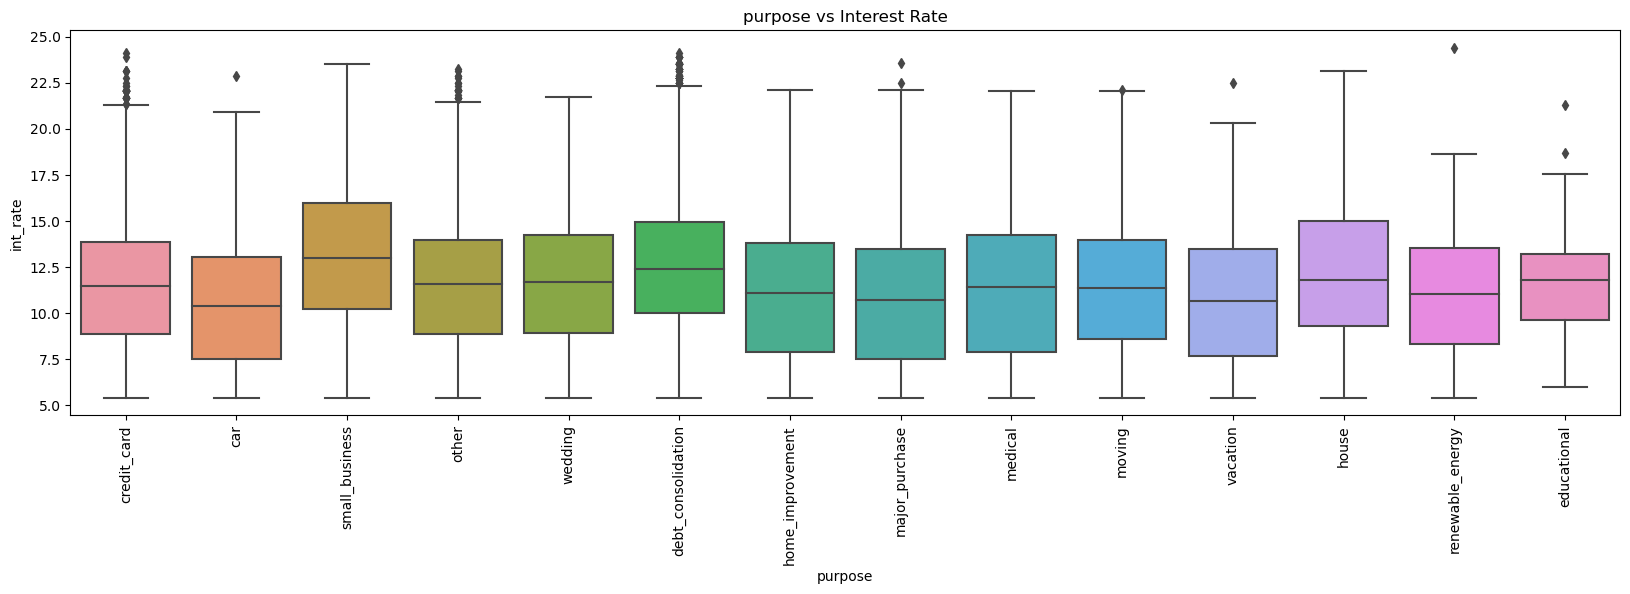

In [69]:
plt.figure(figsize=(20,5))
sns.boxplot(x=loan_data["purpose"], y=loan_data["int_rate"])
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')
plt.show()

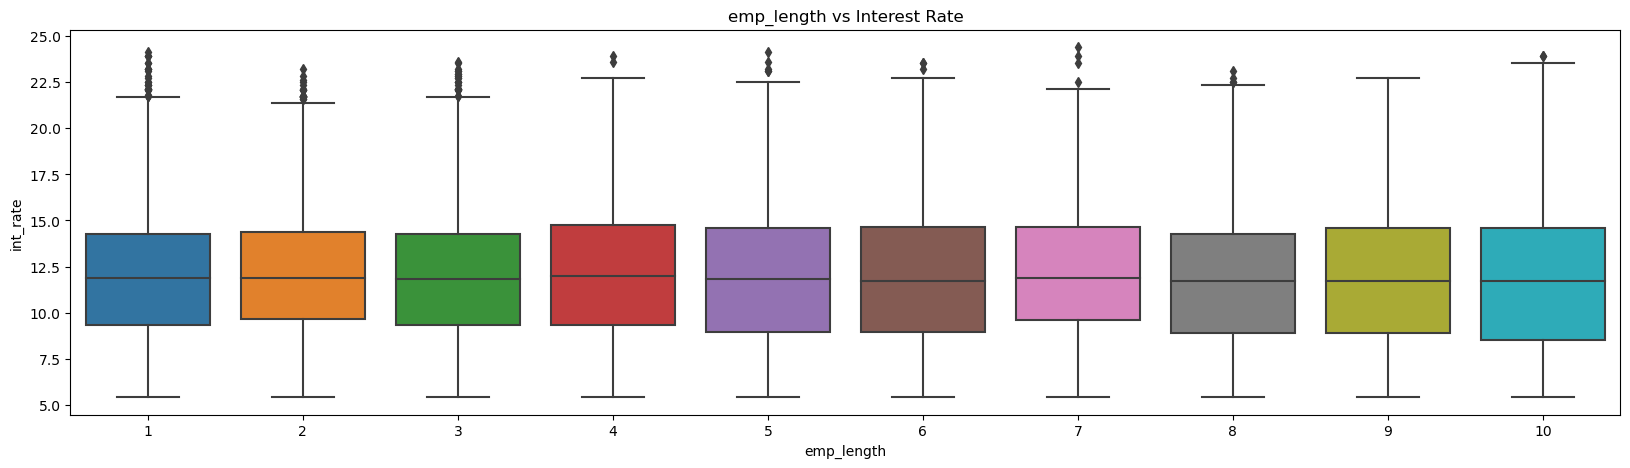

In [70]:
#PS: 
plt.figure(figsize=(20,5))
sns.boxplot(x=loan_data["emp_length"], y=loan_data["int_rate"])
plt.title('emp_length vs Interest Rate')
plt.show()

### Observation:
People who took the loan for Debt consolidation , small business and house have the highest interest rates </br>
Employment length doesnot have relation with interest rate as we can see from the above box plot the median almost lies in same range

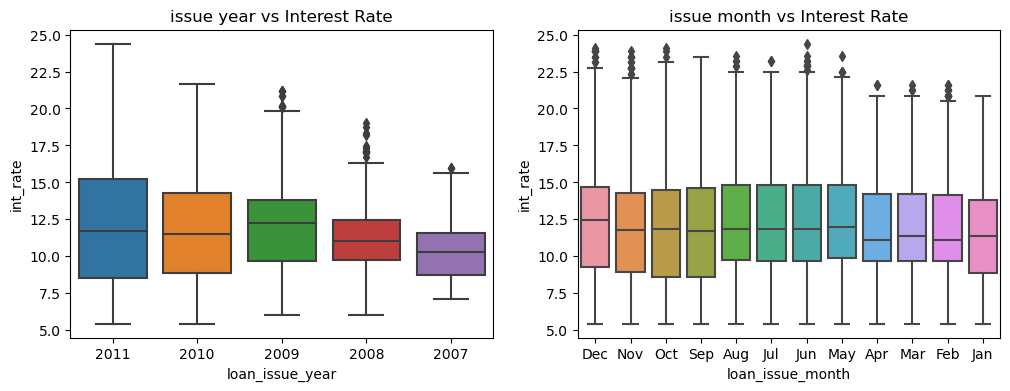

In [71]:
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['loan_issue_year'], y=loan_data['int_rate'])
plt.title('issue year vs Interest Rate')
plt.subplot(1,2,2)
sns.boxplot(x=loan_data['loan_issue_month'], y=loan_data['int_rate'])
plt.title('issue month vs Interest Rate')
plt.show()





### Observation:
The median of the interest rate is more or less same for all the years and month, although the range is varying.

### Annual Income

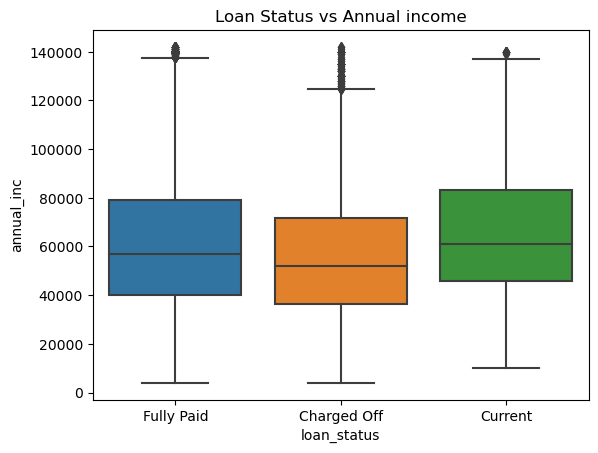

In [72]:
sns.boxplot(x=loan_data['loan_status'], y=loan_data['annual_inc'])
plt.title('Loan Status vs Annual income')
plt.show()

### Observations:
Above boxplot shows that higher income people were able to fully pay the loan. People with lower annual income are mostly with charged off loan status, which means lower income may lead to loan default.

In [73]:
# Analysis based on grade , annual_income and loan status
pvt_grade_loan_status = loan_data[['grade', 'loan_status', 'sub_grade']]
pvt_grade_loan_status.pivot_table(index=['grade'], columns='loan_status', aggfunc=len, fill_value=0).index
pvt_grade_loan_status.pivot_table(index=['grade'], columns='loan_status', aggfunc=len, fill_value=0).loc[:,'sub_grade'].loc[:,'Charged Off']

grade
A     593
B    1378
C    1325
D    1081
E     660
F     289
G      95
Name: Charged Off, dtype: int64

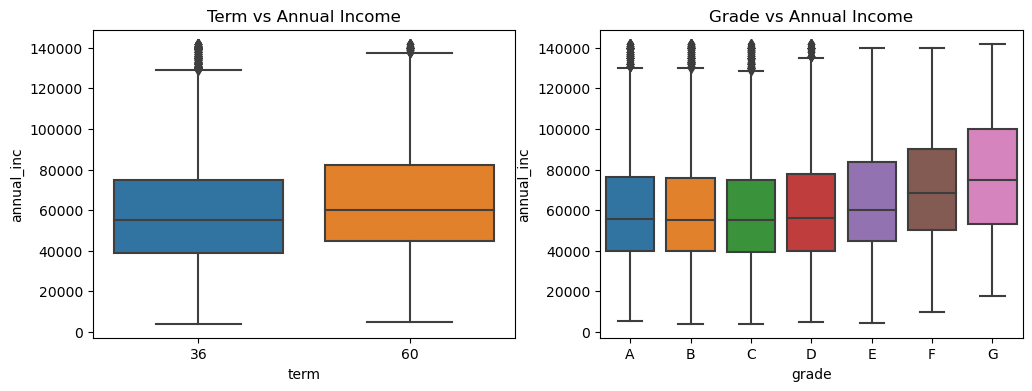

In [74]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['term'], y=loan_data['annual_inc'])
plt.title('Term vs Annual Income')
plt.subplot(1,2,2)
ordergrd = loan_data['grade'].unique()
ordergrd.sort()
sns.boxplot(x=loan_data['grade'], y=loan_data['annual_inc'],order = ordergrd)
plt.title('Grade vs Annual Income')
plt.show()



### Observations:
Higher loan term borrowers have higher annual income whereas lower loan term borrowers have lower income range </br>
Grade A, B, C,D almost have similar annual income range but E, F, G have higher income range comparatively.


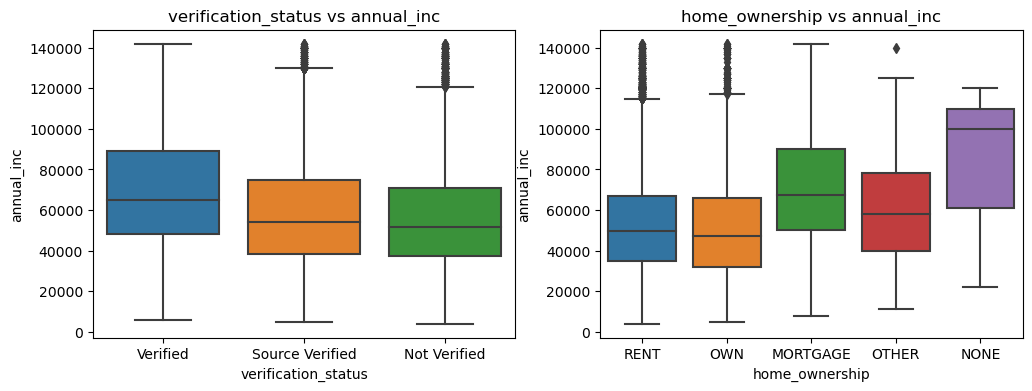

In [75]:
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['verification_status'], y=loan_data['annual_inc'])
plt.title('verification_status vs annual_inc')
plt.subplot(1,2,2)
sns.boxplot(x=loan_data['home_ownership'], y=loan_data['annual_inc'])
plt.title('home_ownership vs annual_inc')
plt.show()



### Observation:
Higher annual income borrowers are mostly verified </br>
Mortgage borrowers have higher income compared with those in rent or own house

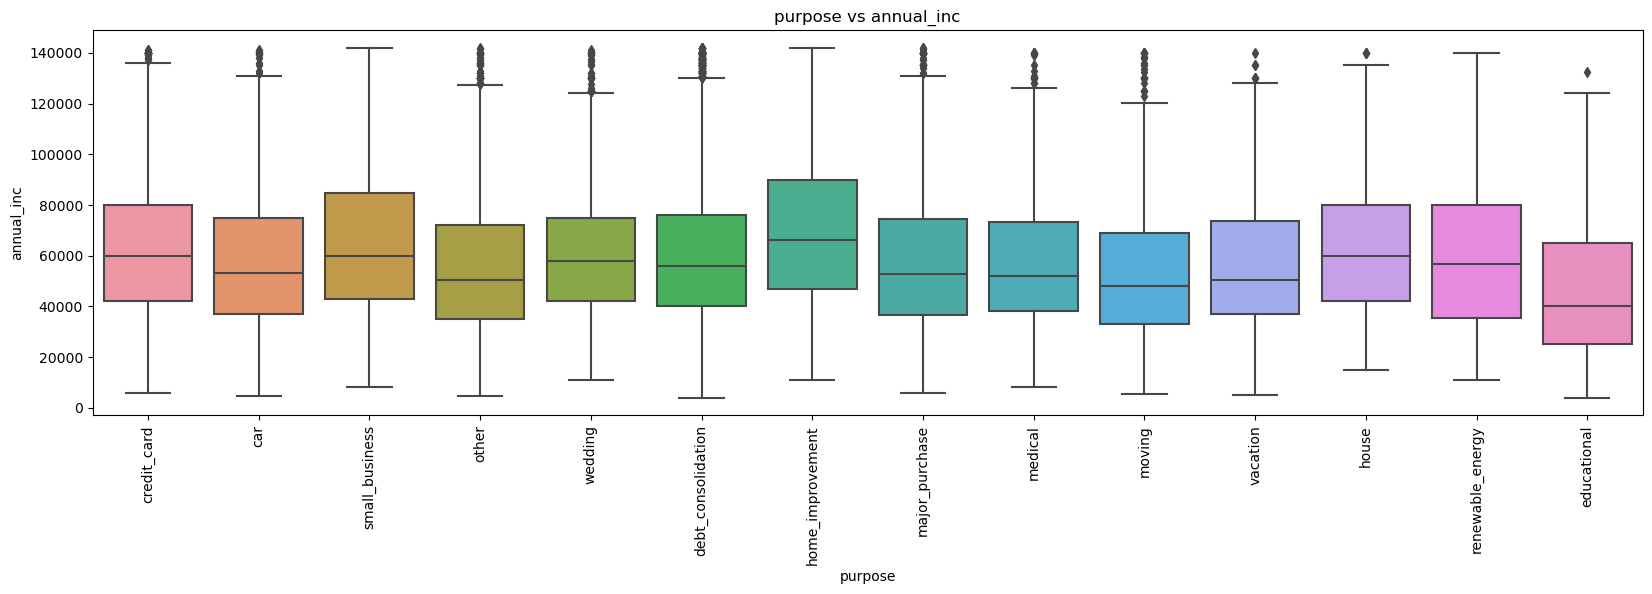

In [76]:
plt.figure(figsize=(20,5))
sns.boxplot(x=loan_data["purpose"], y=loan_data["annual_inc"])
plt.xticks(rotation=90)
plt.title('purpose vs annual_inc')
plt.show()

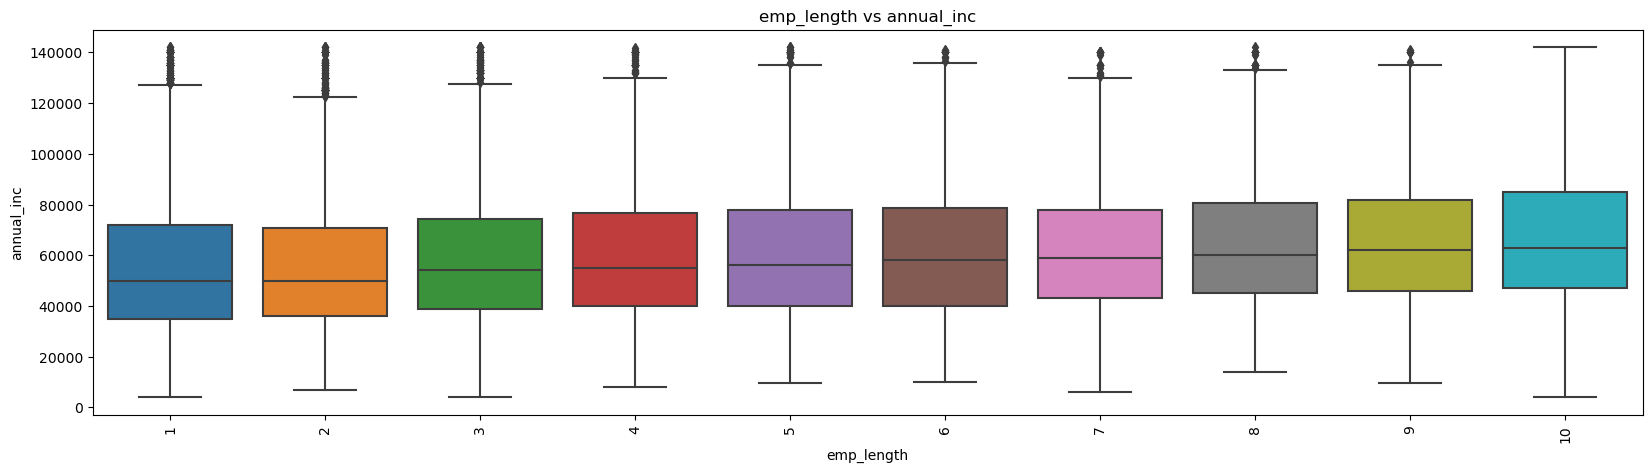

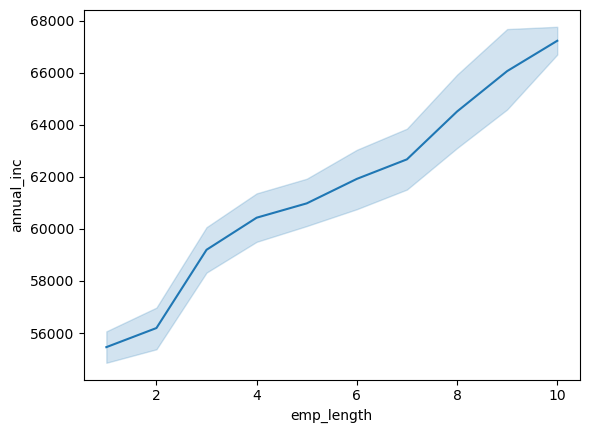

In [77]:
plt.figure(figsize=(20,5))
sns.boxplot(x=loan_data["emp_length"], y=loan_data["annual_inc"])
plt.xticks(rotation=90)
plt.title('emp_length vs annual_inc')
plt.show()

sns.lineplot(x=loan_data["emp_length"].astype(int), y=loan_data["annual_inc"])
plt.show()



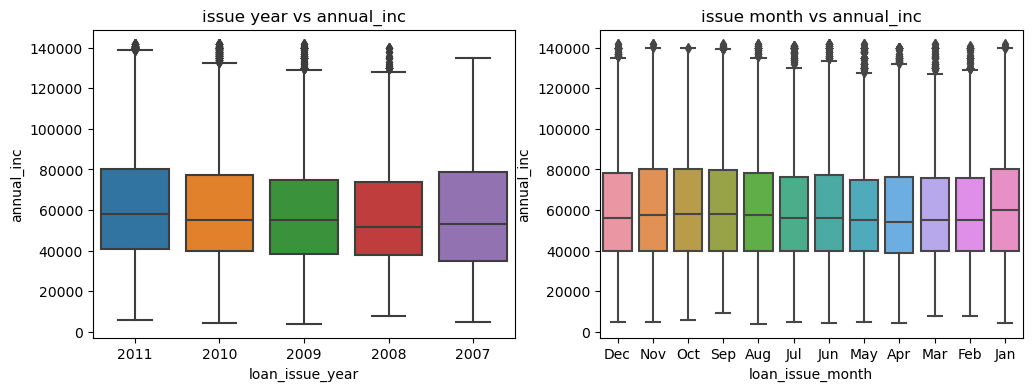

In [78]:
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['loan_issue_year'], y=loan_data['annual_inc'])
plt.title('issue year vs annual_inc')
plt.subplot(1,2,2)
sns.boxplot(x=loan_data['loan_issue_month'], y=loan_data['annual_inc'])
plt.title('issue month vs annual_inc')
plt.show()

### Observation:
Borrowers who took the loan for small business, home improvement and renewable energy have higher income than others </br>
Borrowers with more than 10 years of employment have higher annual income </br>
No such relationship between annual income and loan issued year or month

### Loan Amount

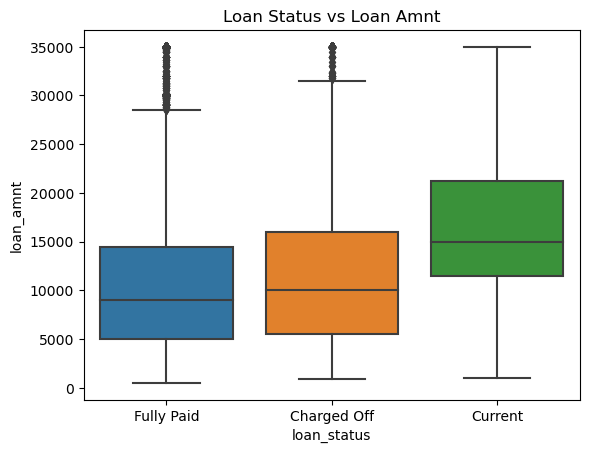

In [79]:
sns.boxplot(x=loan_data['loan_status'], y=loan_data['loan_amnt'])
plt.title('Loan Status vs Loan Amnt')
plt.show()

### Observation:
Charged off status has higher loan amount than fully paid .Higher the loan amount more is the chance of default

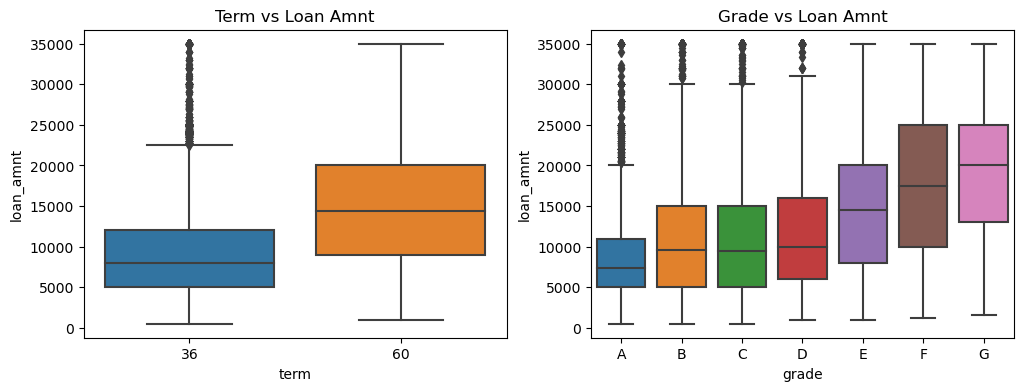

In [80]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['term'], y=loan_data['loan_amnt'])
plt.title('Term vs Loan Amnt')
plt.subplot(1,2,2)
ordergrd = loan_data['grade'].unique()
ordergrd.sort()
sns.boxplot(x=loan_data['grade'], y=loan_data['loan_amnt'],order = ordergrd)
plt.title('Grade vs Loan Amnt')
plt.show()

### Observation

60 months loan term is mainly given for higher loan amounts. Higher the loan term higher the amount </br>
Grades E and F have higher loan amounts than other grades

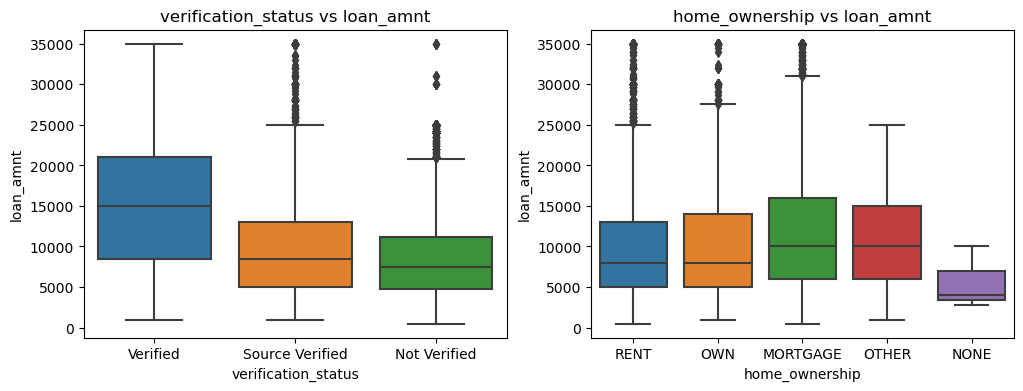

In [81]:
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['verification_status'], y=loan_data['loan_amnt'])
plt.title('verification_status vs loan_amnt')
plt.subplot(1,2,2)
sns.boxplot(x=loan_data['home_ownership'], y=loan_data['loan_amnt'])
plt.title('home_ownership vs loan_amnt')
plt.show()

### Observation
Verified borrowers are given higher loan amount </br>
Mortgage borrowers are given higher loan amount and also its median is higher than others

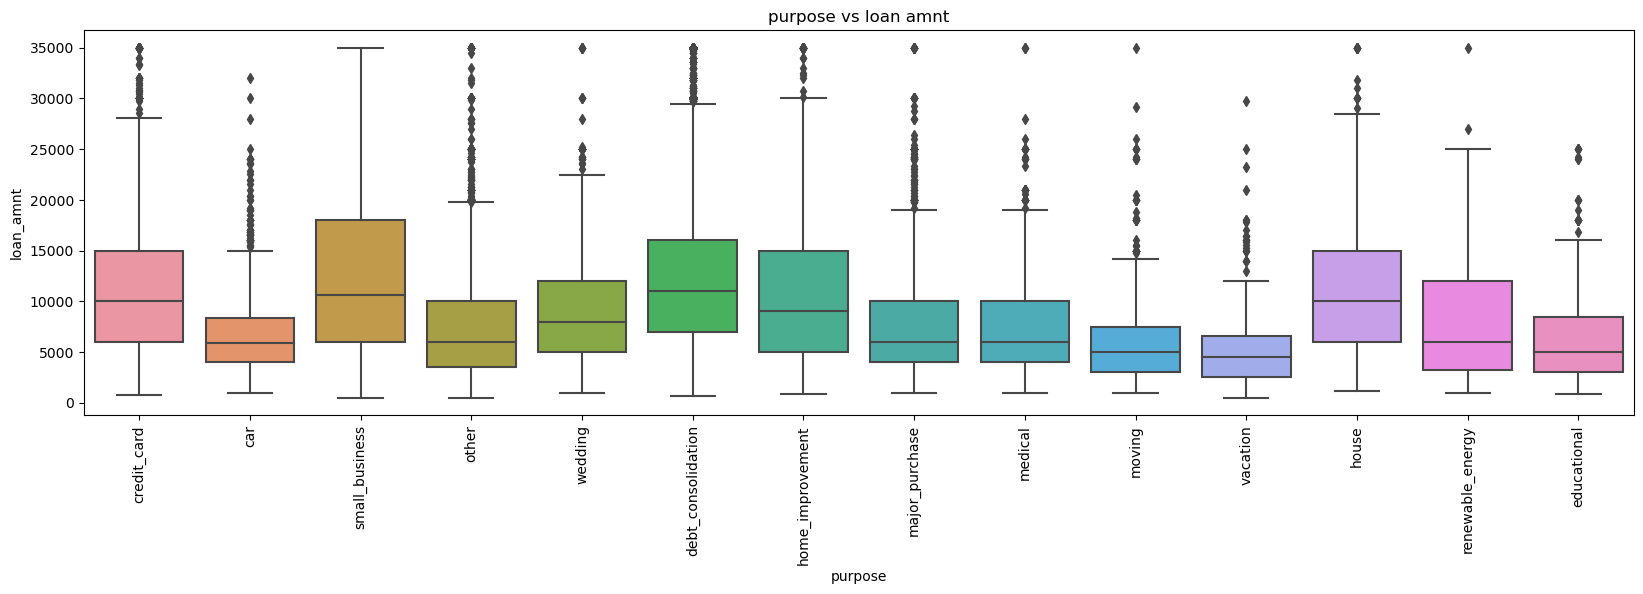

In [82]:
plt.figure(figsize=(20,5))
sns.boxplot(x=loan_data["purpose"], y=loan_data["loan_amnt"])
plt.xticks(rotation=90)
plt.title('purpose vs loan amnt')
plt.show()

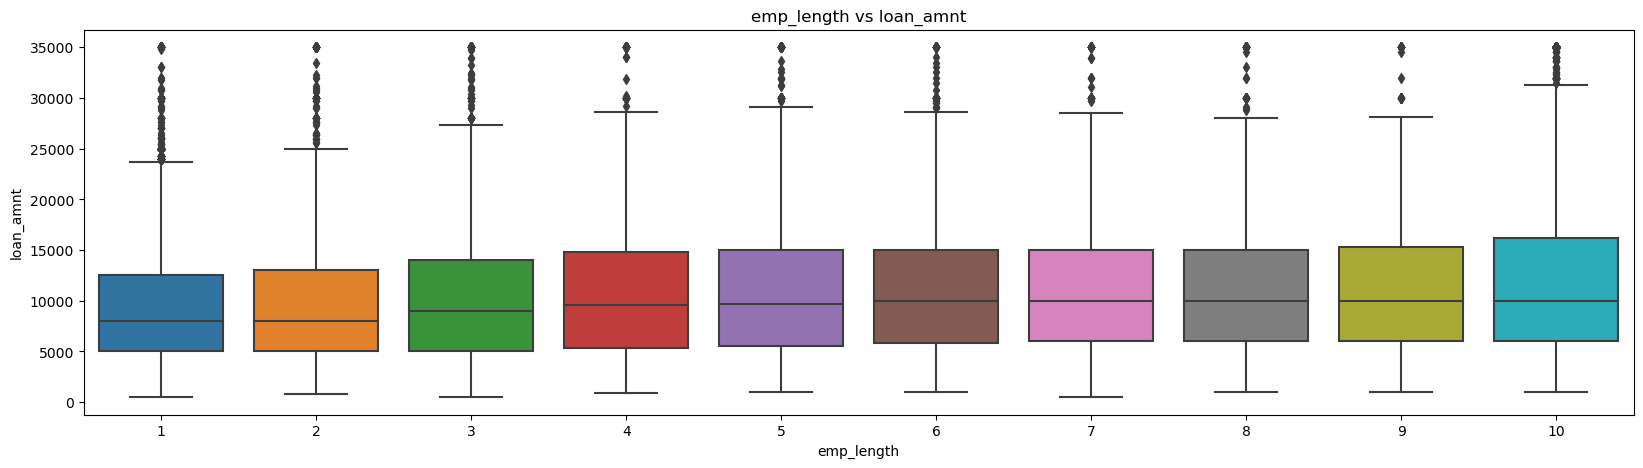

In [83]:
plt.figure(figsize=(20,5))
sns.boxplot(x=loan_data["emp_length"], y=loan_data["loan_amnt"])
plt.title('emp_length vs loan_amnt')
plt.show()
#lineplot

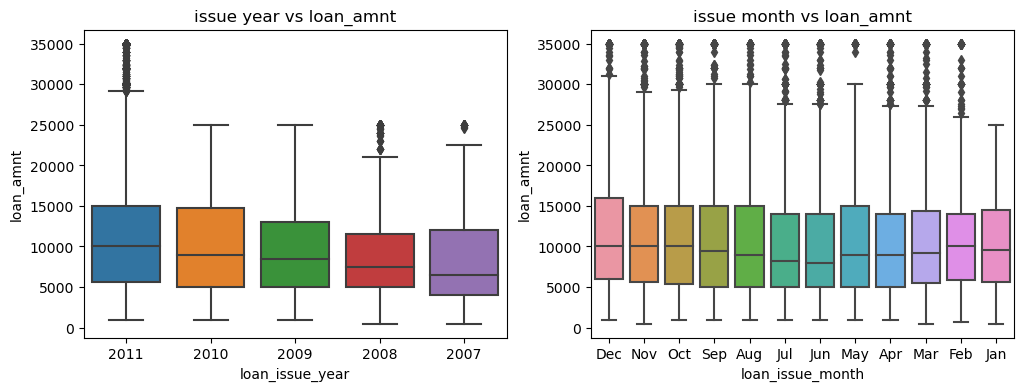

In [84]:
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['loan_issue_year'], y=loan_data['loan_amnt'])
plt.title('issue year vs loan_amnt')
plt.subplot(1,2,2)
sns.boxplot(x=loan_data['loan_issue_month'], y=loan_data['loan_amnt'])
plt.title('issue month vs loan_amnt')
plt.show()

### Observation
Loan category of small business has higher loan amount than others </br>
Loan amount consistently increases as the years of employment increase </br>
Loan amount is almost doubling as the years progress which more people are getting loans approved every passing year</br>

### DTI

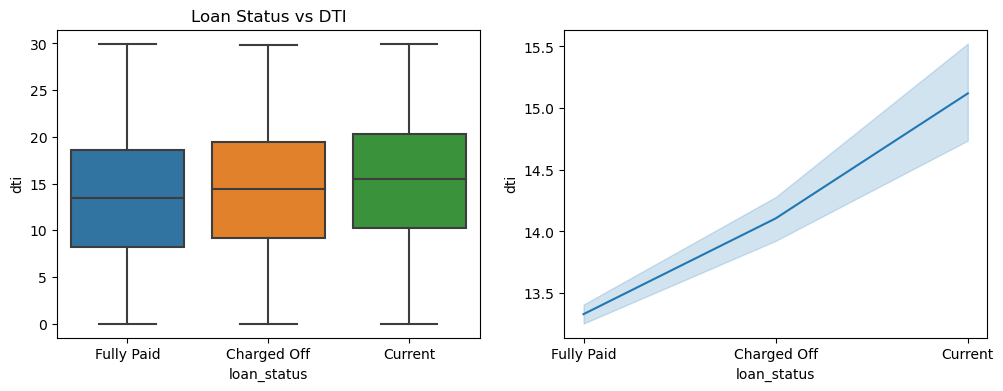

In [85]:
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['loan_status'], y=loan_data['dti'])
plt.title('Loan Status vs DTI')

plt.subplot(1,2,2)
#lineplot
sns.lineplot(x=loan_data['loan_status'], y=loan_data['dti'])
plt.show()

### Observation
Although the DTI distribution is not much varying, but median is slightly higher so we can still say lower dti borrwers have fully paid the loans. Higher DTI may lead to loan default.

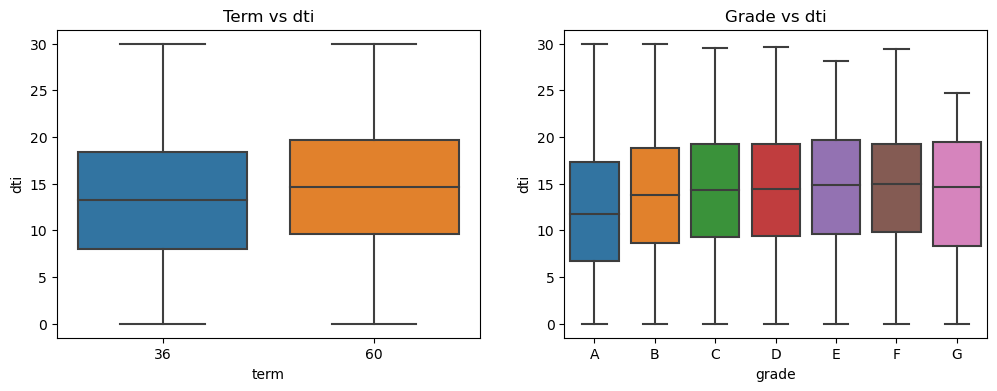

In [86]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['term'], y=loan_data['dti'])
plt.title('Term vs dti')
plt.subplot(1,2,2)
ordergrd = loan_data['grade'].unique()
ordergrd.sort()
sns.boxplot(x=loan_data['grade'], y=loan_data['dti'],order = ordergrd)
plt.title('Grade vs dti')
plt.show()

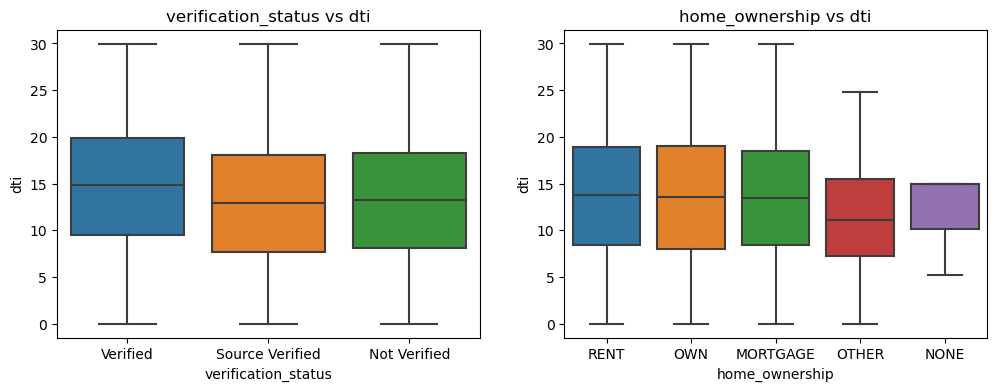

In [87]:
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['verification_status'], y=loan_data['dti'])
plt.title('verification_status vs dti')
plt.subplot(1,2,2)
sns.boxplot(x=loan_data['home_ownership'], y=loan_data['dti'])
plt.title('home_ownership vs dti')
plt.show()

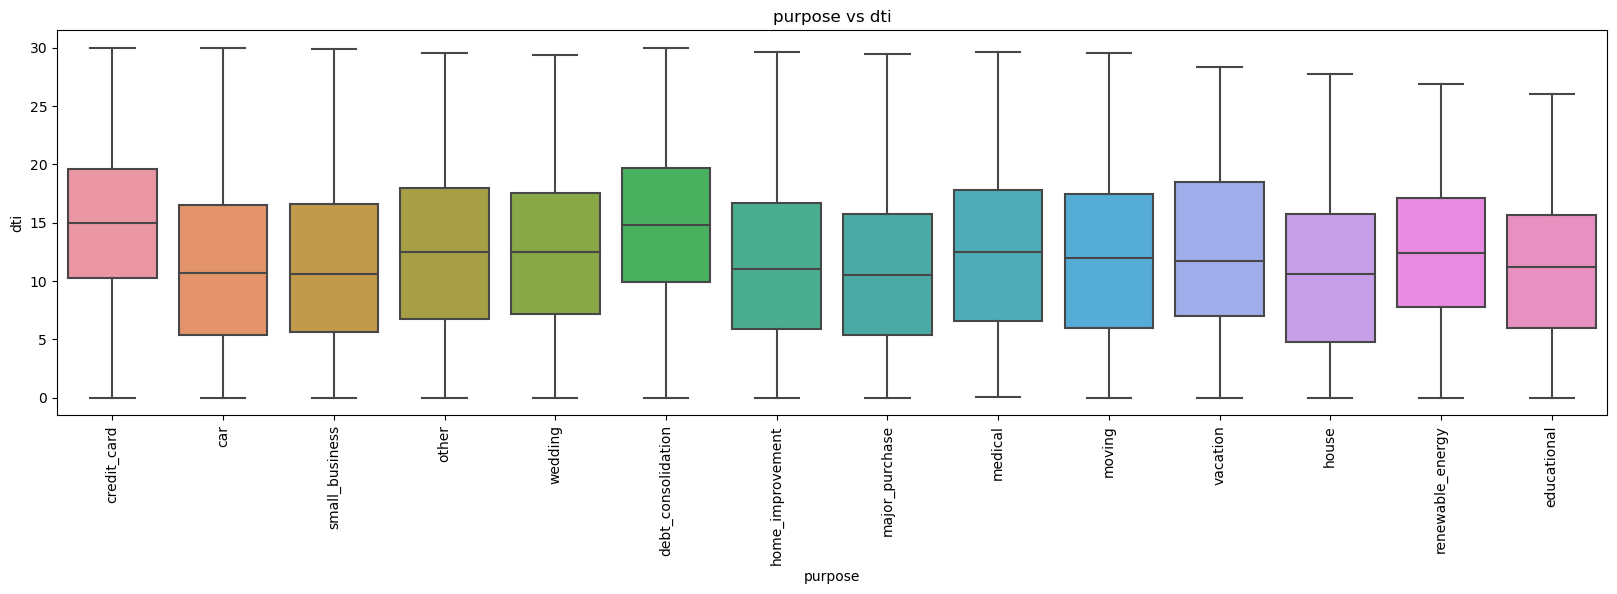

In [88]:
plt.figure(figsize=(20,5))
sns.boxplot(x=loan_data["purpose"], y=loan_data["dti"])
plt.xticks(rotation=90)
plt.title('purpose vs dti')
plt.show()

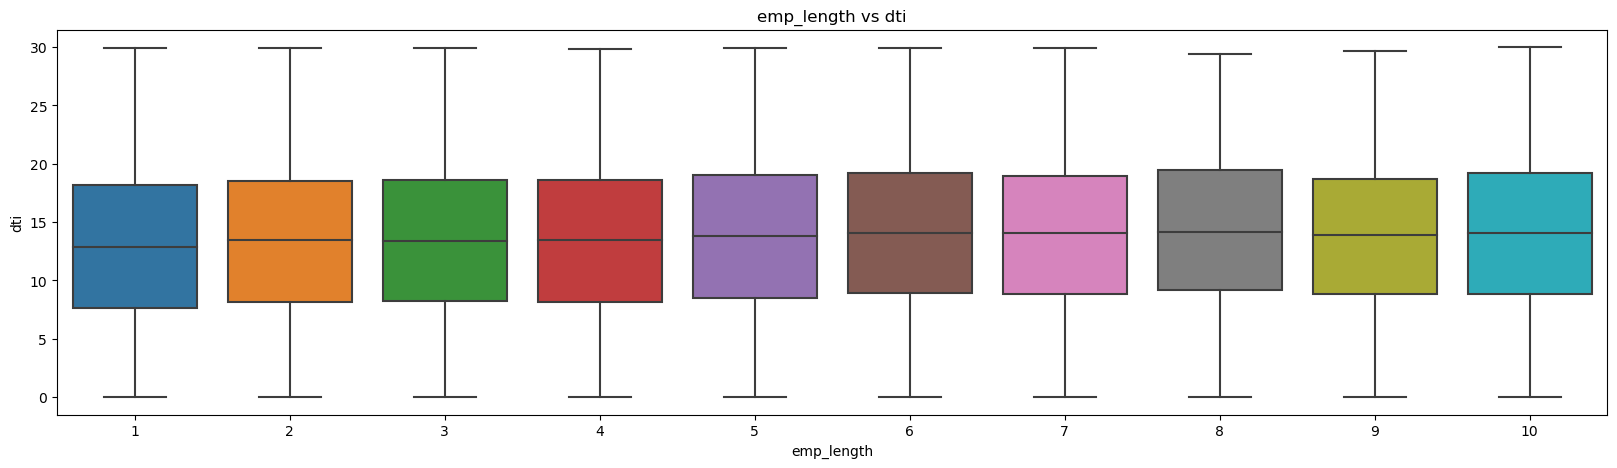

In [89]:
plt.figure(figsize=(20,5))
sns.boxplot(x=loan_data["emp_length"], y=loan_data["dti"])
plt.title('emp_length vs dti')
plt.show()



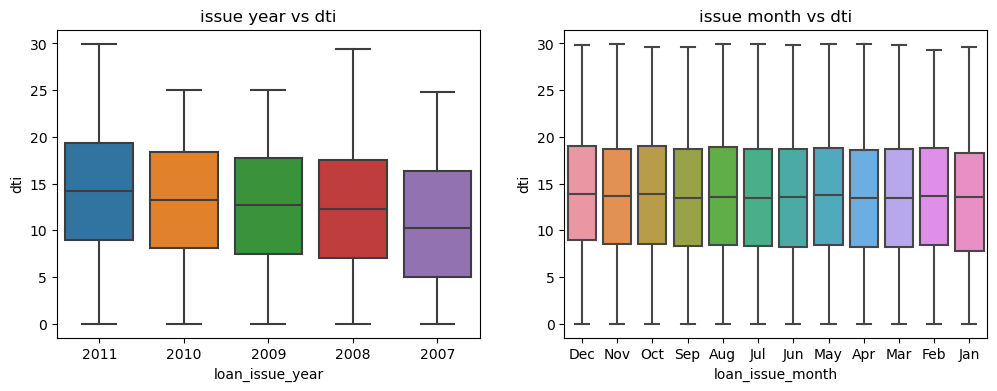

In [90]:
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x=loan_data['loan_issue_year'], y=loan_data['dti'])
plt.title('issue year vs dti')
plt.subplot(1,2,2)
sns.boxplot(x=loan_data['loan_issue_month'], y=loan_data['dti'])
plt.title('issue month vs dti')
plt.show()


### Bivariate Analysis




### Loan Amount vs Int rate

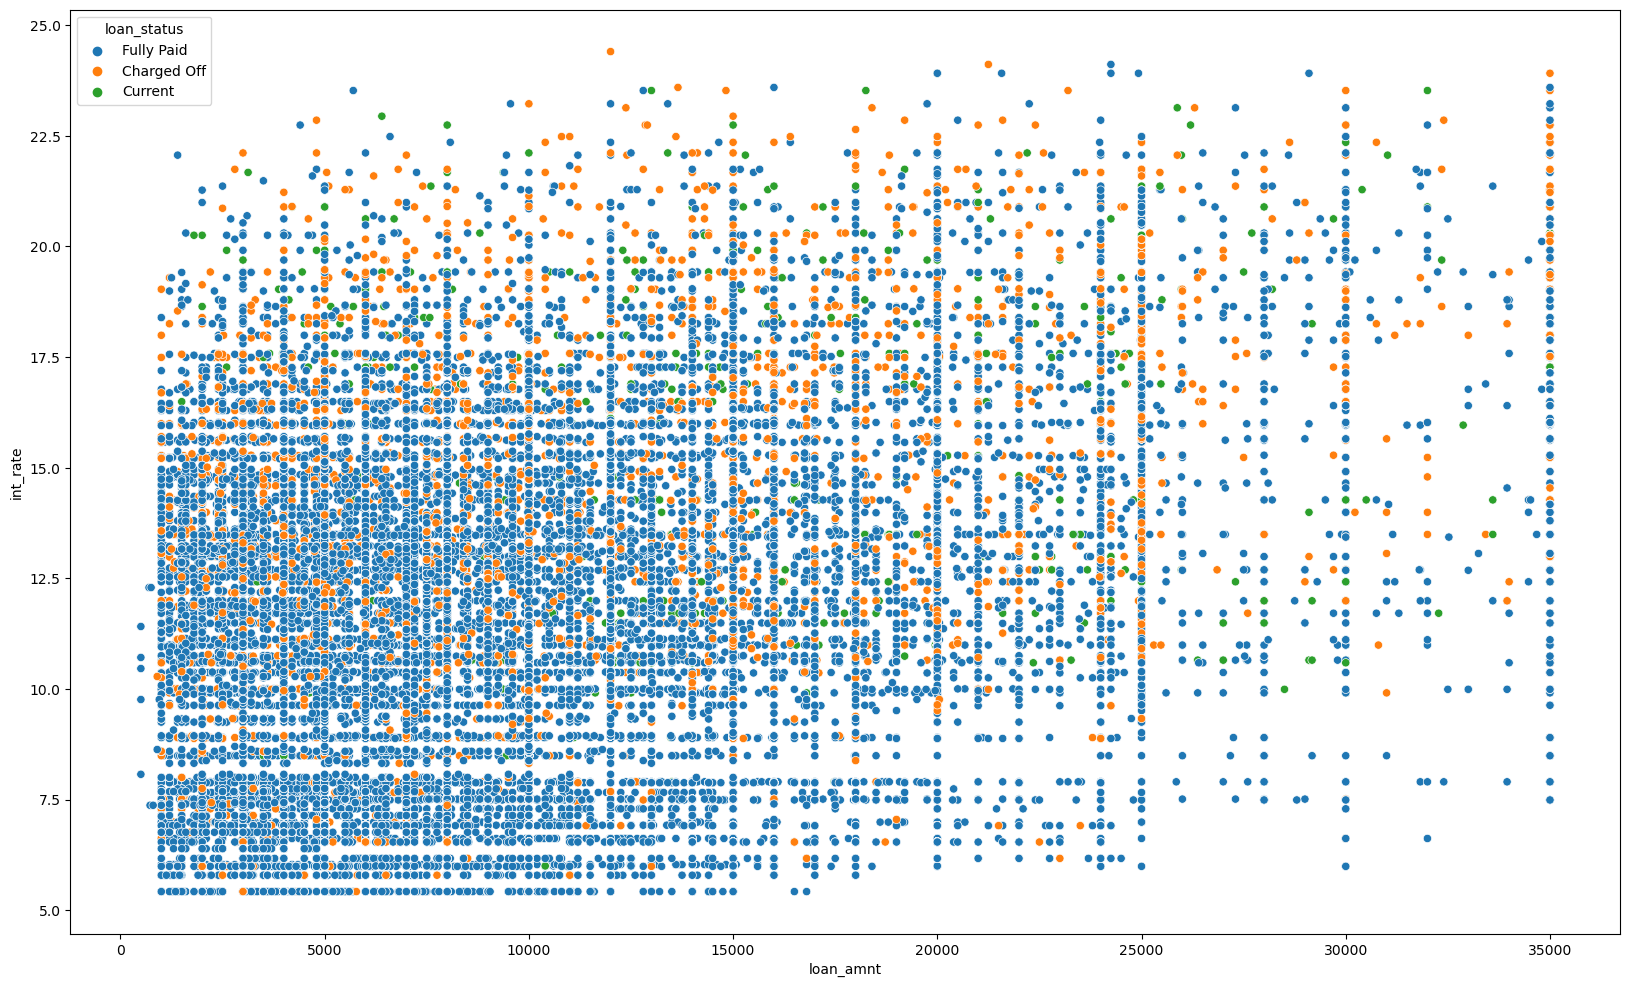

In [91]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_data, hue='loan_status')
plt.show()

### Observation:
There is no specific correlation between loan amount and interest rate

### DTI vs Loan amount

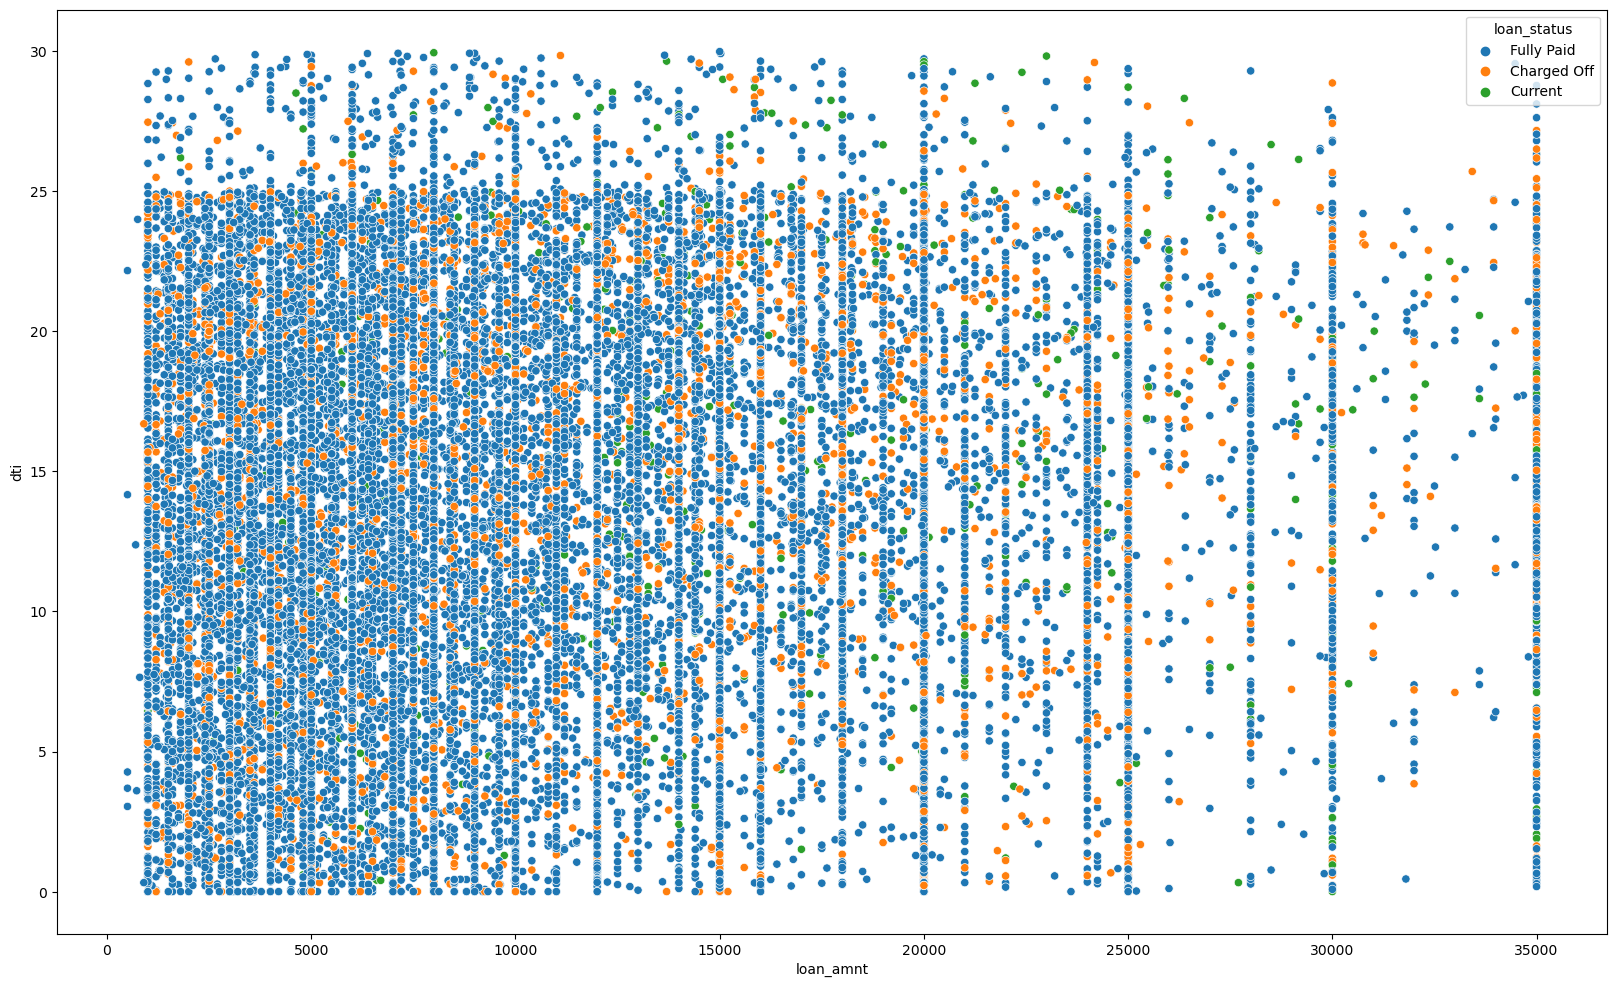

In [92]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='loan_amnt', y='dti', data=loan_data, hue='loan_status')
plt.show()

### Observation
NO specific pattern or correlation found between dti and loan amount

### DTI vs Interest Rate

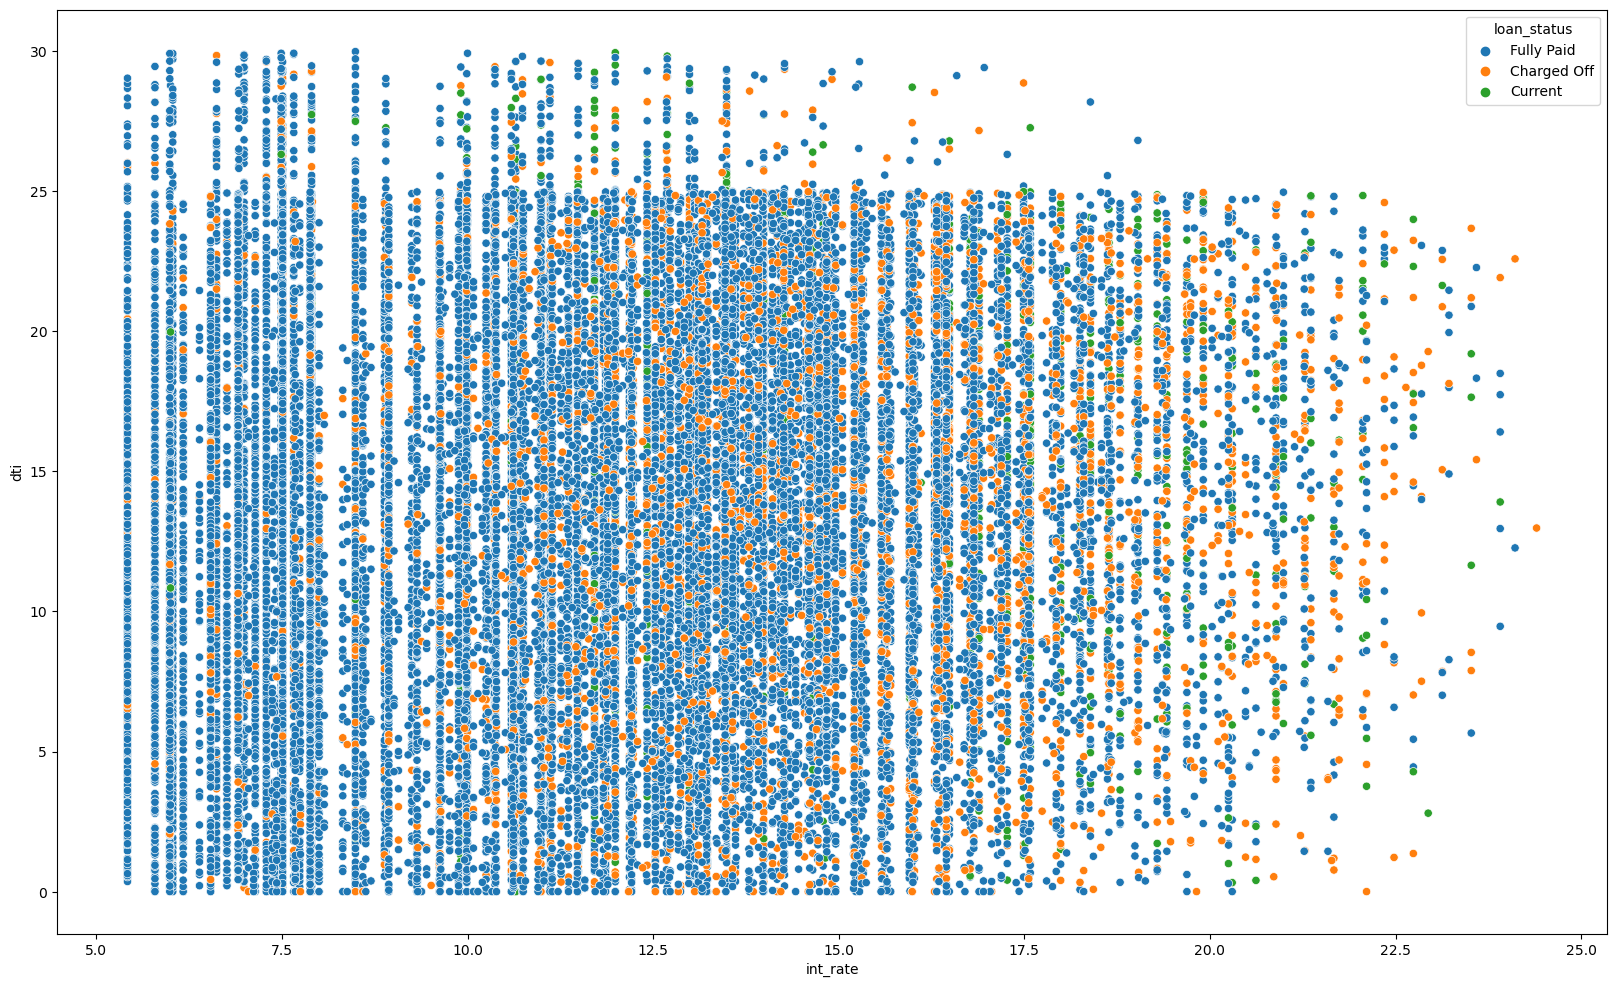

In [93]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='int_rate', y='dti', data=loan_data, hue='loan_status')
plt.show()

### Numerical vs Categorical

In [94]:
# common function for bivariate analysis categorical variable vs loan status

def multiple_barplot_loanstatus(dataframe, index_col, xlabel, ylabel):
    pvt_table = pd.pivot_table(data=dataframe, index=index_col, columns='loan_status', aggfunc=len, fill_value=0)
    
    label = []
    category_col=[]       
    values = []
    
    for labelvalue in pvt_table.index:
        for i in range(0,3):
            label.append(labelvalue)
    
    for a, b, c in zip(list(pvt_table['Charged Off'].values), list(pvt_table['Fully Paid'].values), list(pvt_table['Current'].values)):
        values.append(a)
        values.append(b)
        values.append(c)
        category_col.append("Charge Off")
        category_col.append("Fully Paid")
        category_col.append("Current")
        
    data = {
        'label_column': label,
        'category_column': category_col,
        'value': values
    }
    
    df_purpose = pd.DataFrame(data)
    plt.figure(figsize=(12,5))

    # Creating the bar plot with multiple bars for each label using Seaborn
    sns.barplot(x='label_column', y='value', hue='category_column', data=df_purpose)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

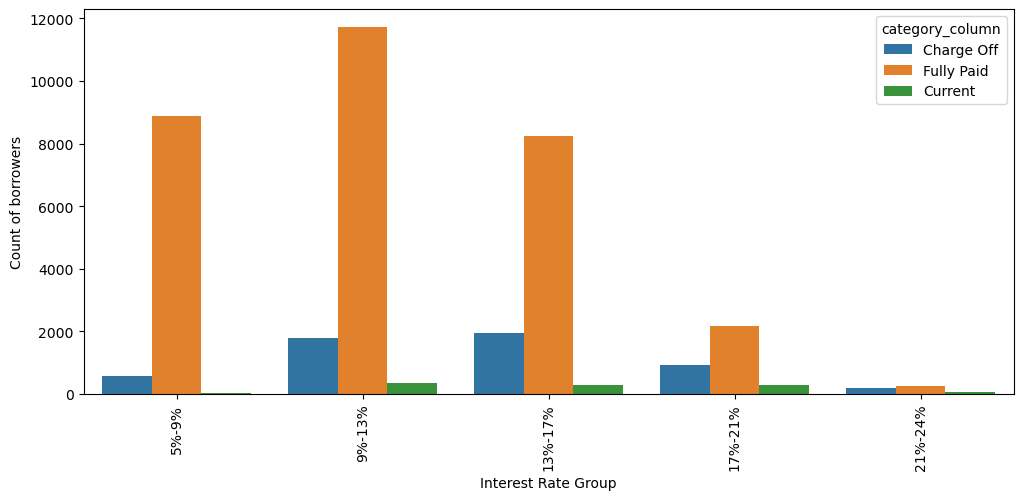

In [95]:
#Interest rate groups - to check for which range of interest is the number of loan defaulter maximum

df_intr_loanstatus = loan_data[['int_rate_groups', 'loan_status']]

multiple_barplot_loanstatus(dataframe=df_intr_loanstatus, index_col='int_rate_groups', xlabel="Interest Rate Group", ylabel="Count of borrowers")

### Term vs Loan Status

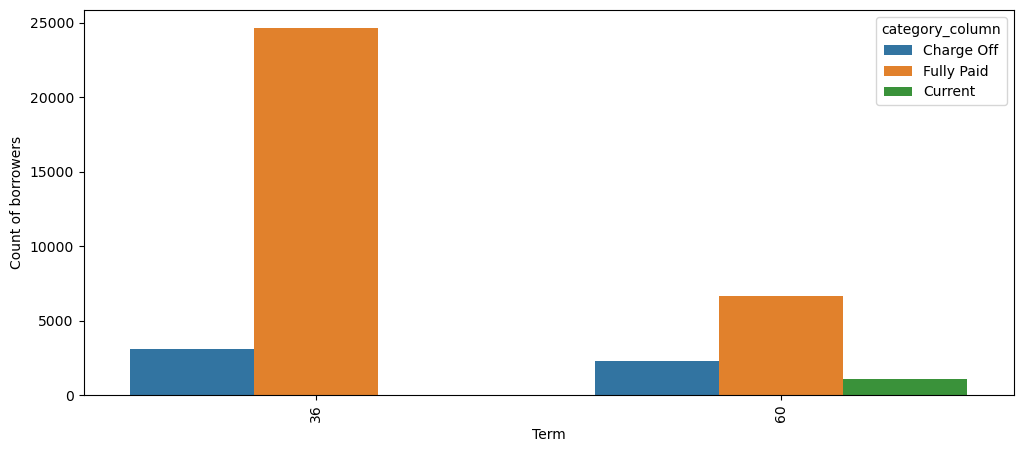

In [96]:

df_term_loanstatus = loan_data[['term', 'loan_status']]

multiple_barplot_loanstatus(dataframe=df_term_loanstatus, index_col='term', xlabel="Term", ylabel="Count of borrowers")

### Observation:
Number of borrowers who defaulted the loan is more for 36 months than 60 months </br>


### Term vs Loan Amnt

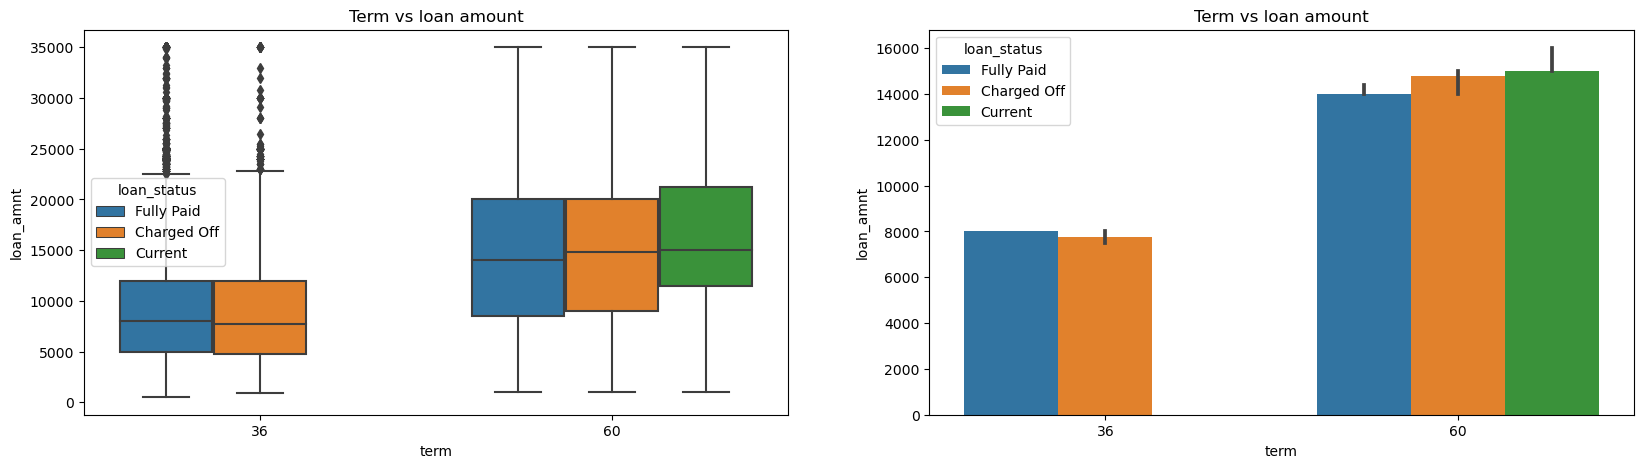

In [97]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan_data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

### Observation:

Almost similar distribution is found for both fully paid and charged off loan status for both 36 and 60 months loan term. Hence loan amount cannot be a factor to determine loan defaulters based on loan terms

### Term vs Interest Rate

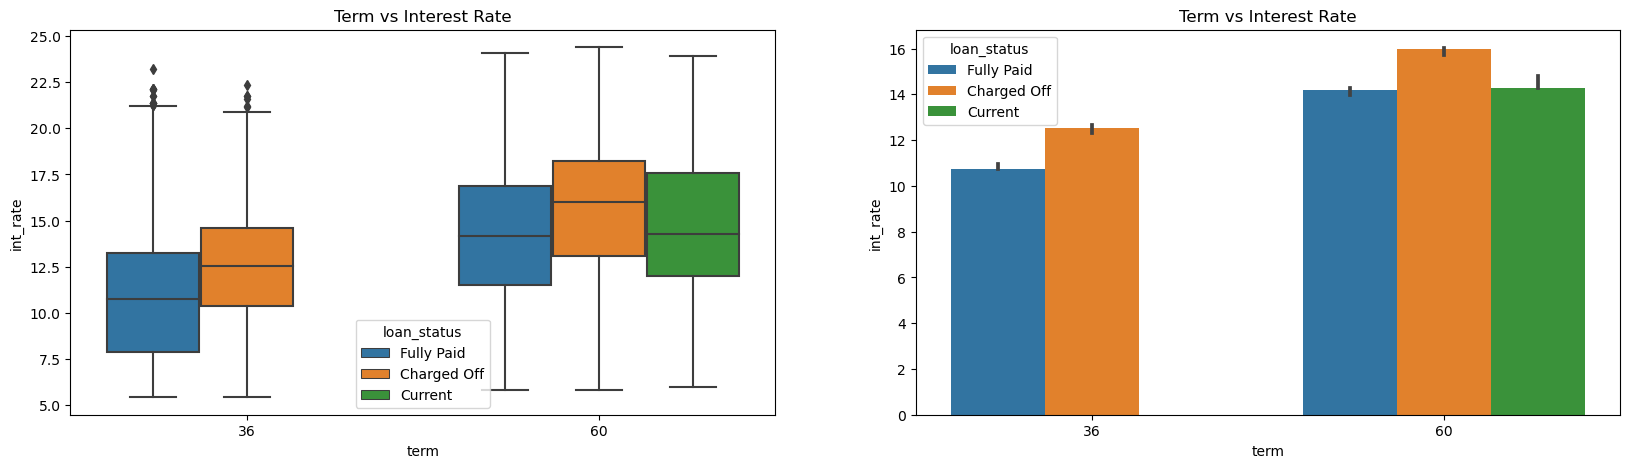

In [98]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan_data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan_data, estimator=np.median)
plt.title('Term vs Interest Rate')
plt.show()

### Observation:

When interest rate is higher loan default is higher for both loan terms

### Term vs DTI

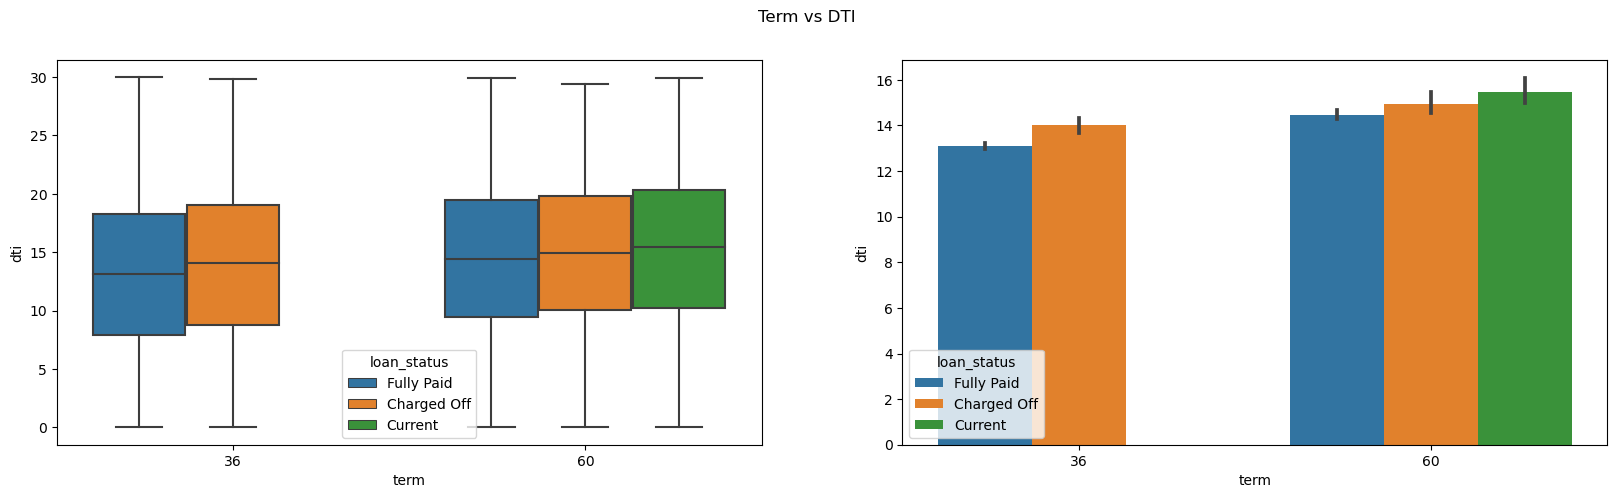

In [99]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

### Observation:
Charged off borrowers are more compared to fully paid for DTI

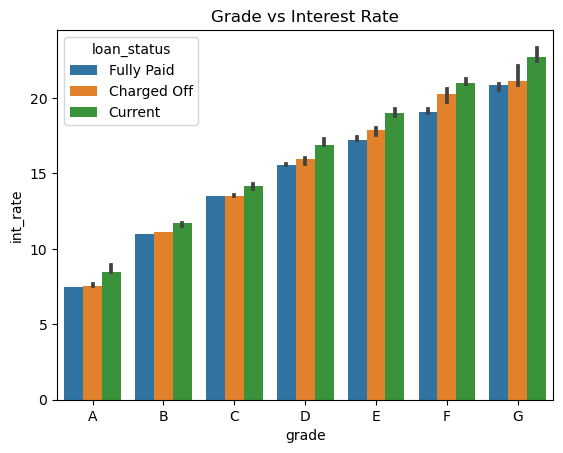

In [100]:
grade_ord = loan_data.grade.unique()
grade_ord.sort()

sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan_data, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

### Observation:
As the we move from grade A to G the interest rate increases. 

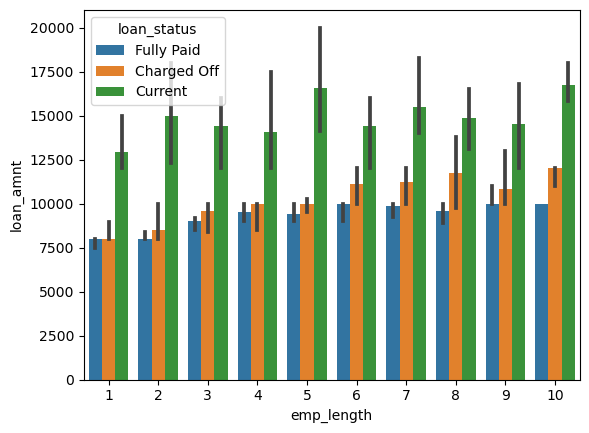

In [101]:
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.show()

### Observation:

Borrowers with higher employment length of 7 years or more have taken more loan amounts and thus are more prone to default

### For which purpose is the count of defaulter is higher? 

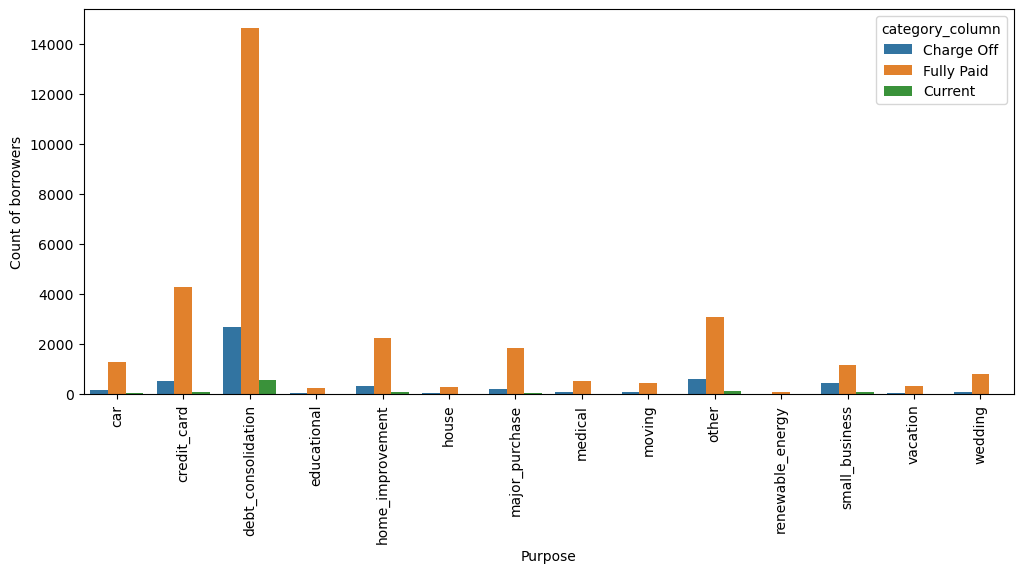

In [102]:
pt_purpose_loanstatus = loan_data[['purpose', 'loan_status']]

multiple_barplot_loanstatus(dataframe=pt_purpose_loanstatus, index_col='purpose', xlabel="Purpose", ylabel="Count of borrowers")

 From above graph clearly debt consolidation has highest number of loan defaulters

### Analysis based on grade , annual_income and loan status

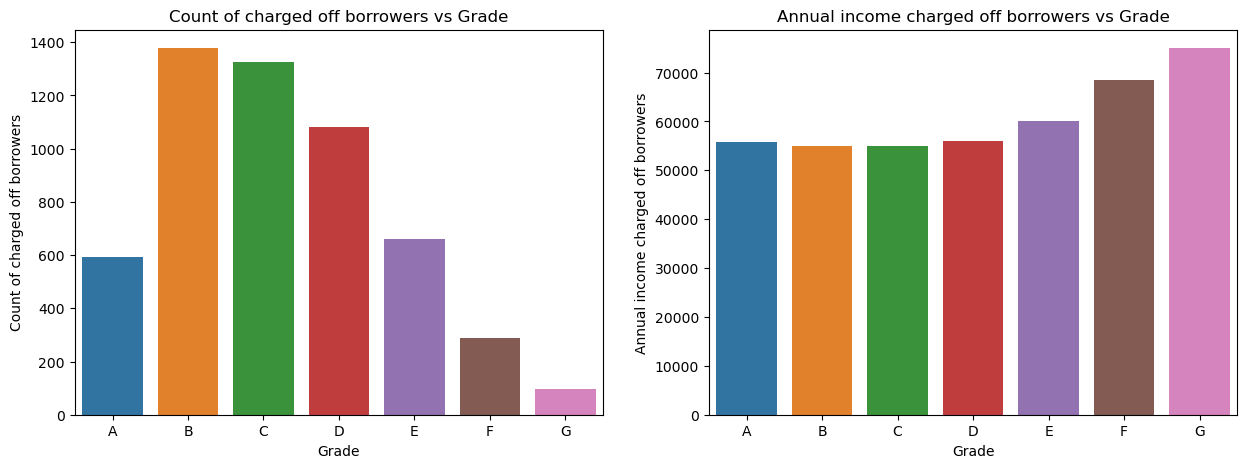

In [103]:

pvt_grade_loan_status = loan_data[['grade', 'loan_status', 'sub_grade']]
pvt_grade_loan_status.pivot_table(index=['grade'], columns='loan_status', aggfunc=len, fill_value=0).index
pvt_grade_loan_status.pivot_table(index=['grade'], columns='loan_status', aggfunc=len, fill_value=0).loc[:,'sub_grade'].loc[:,'Charged Off']


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x= list(pvt_grade_loan_status.pivot_table(index=['grade'], columns='loan_status', aggfunc=len, fill_value=0).loc[:,'sub_grade'].loc[:,'Charged Off'].index), \
       y= list(pvt_grade_loan_status.pivot_table(index=['grade'], columns='loan_status', aggfunc=len, fill_value=0).loc[:,'sub_grade'].loc[:,'Charged Off'].values.flatten()))
plt.xlabel("Grade")
plt.ylabel("Count of charged off borrowers")
plt.title("Count of charged off borrowers vs Grade")
plt.subplot(1,2,2)
# plt.bar(list(loan_data.pivot_table(index='grade', values='annual_inc', aggfunc='median', fill_value=0).index) \
#        , list(loan_data.pivot_table(index='grade', values='annual_inc', aggfunc='median', fill_value=0).values.flatten()))
sns.barplot(x= list(loan_data.pivot_table(index='grade', values='annual_inc', aggfunc='median', fill_value=0).index)\
       ,y = list(loan_data.pivot_table(index='grade', values='annual_inc', aggfunc='median', fill_value=0).values.flatten()))
plt.xlabel("Grade")
plt.ylabel("Annual income charged off borrowers")
plt.title("Annual income charged off borrowers vs Grade")

plt.show()

The maximum loan defaulters are found to be mostly in grades B, C, D. Annual income of borrowers in this grade is also relatively less than others.

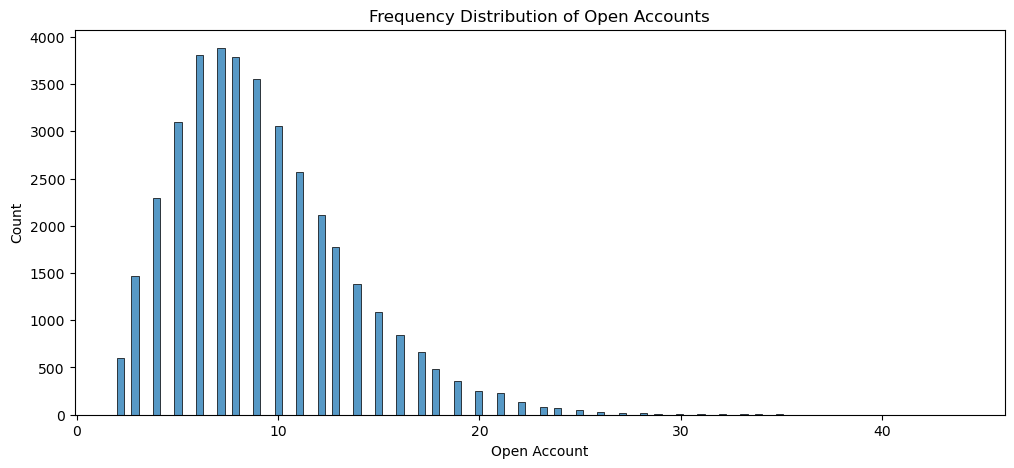

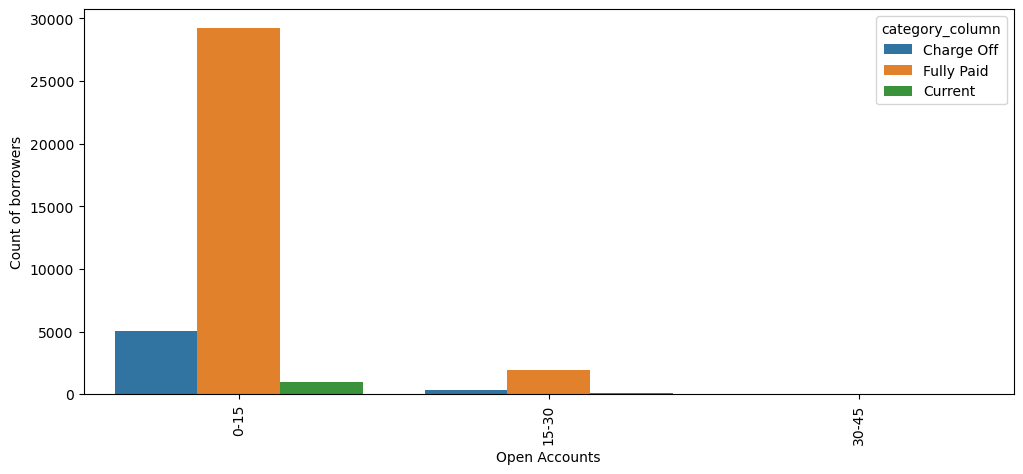

In [104]:
#Analysis based on multiple open accounts and loan status
plt.figure(figsize=(12,5))

plt.title("Frequency Distribution of Open Accounts")
sns.histplot(loan_data.open_acc)
plt.xlabel("Open Account")

open_acc_loan_status = loan_data[['open_acc', 'loan_status']]
open_acc_loan_status['open_acc_groups'] = pd.cut(open_acc_loan_status['open_acc'], bins=3,labels=['0-15','15-30','30-45'])
open_acc_loan_status.drop("open_acc", axis=1,inplace = True)

multiple_barplot_loanstatus(dataframe=open_acc_loan_status, index_col='open_acc_groups', xlabel="Open Accounts", ylabel="Count of borrowers")




loan_issue_month   Apr   Aug   Dec   Feb   Jan   Jul   Jun   Mar   May   Nov  \
loan_status                                                                    
Charged Off        360   450   657   282   311   457   463   329   453   580   
Current              3   117   206     0     0   117    94     1    71   145   
Fully Paid        2353  2770  3364  1970  1959  2744  2553  2226  2337  3243   

loan_issue_month   Oct   Sep  
loan_status                   
Charged Off        546   533  
Current            160   140  
Fully Paid        2987  2762  


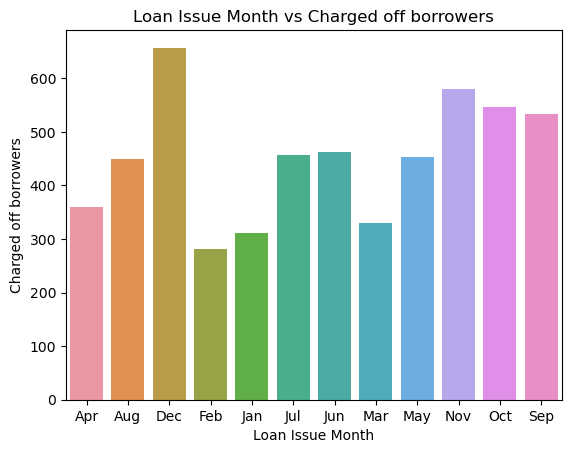

In [105]:
#PS : Which quarter of the year is prone to more defaulters (Categorical vs Categorical)

loan_st_issue_d_m = pd.crosstab(loan_data.loan_status, loan_data.loan_issue_month)
print(loan_st_issue_d_m)

sns.barplot(x=list(loan_st_issue_d_m.loc['Charged Off', :].index), \
       y=list(loan_st_issue_d_m.loc['Charged Off', :].values.flatten()))
plt.xlabel("Loan Issue Month")
plt.ylabel("Charged off borrowers")
plt.title("Loan Issue Month vs Charged off borrowers")
plt.show()

home_ownership  MORTGAGE  NONE  OTHER   OWN   RENT
loan_status                                       
Charged Off         2197     0     17   434   2773
Current              570     0      0    80    404
Fully Paid         13505     3     76  2421  15263
home_ownership
MORTGAGE     67200.0
NONE        100000.0
OTHER        58000.0
OWN          47000.0
RENT         49390.0
Name: annual_inc, dtype: float64


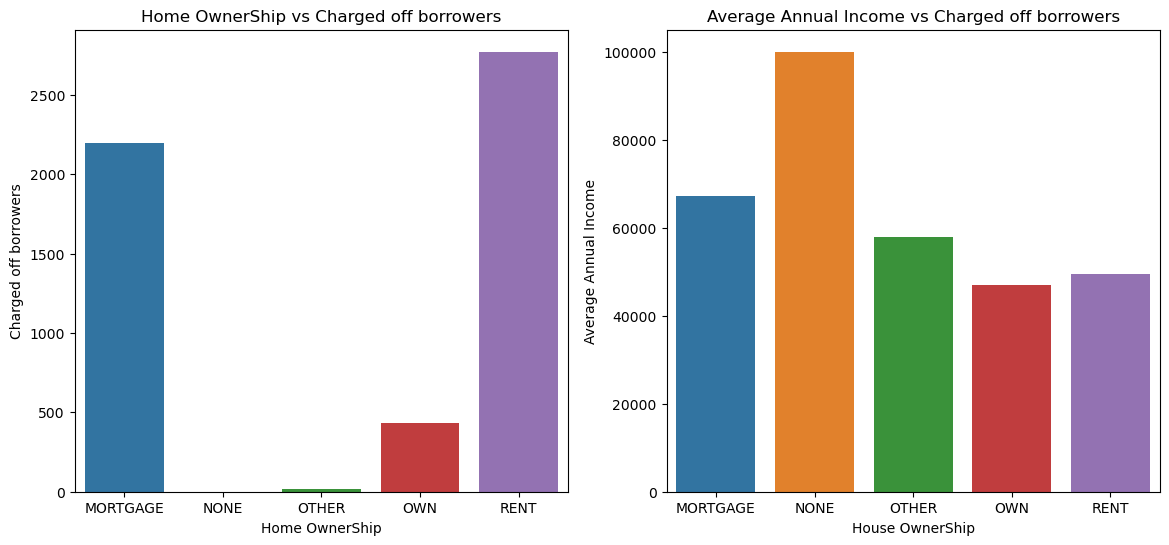

In [106]:
#PS : Analysis on home Owner ship and loan Status (categorical vs categorical)

homeown_loanstatus = pd.crosstab(loan_data.loan_status, loan_data.home_ownership)
print(homeown_loanstatus)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=list(homeown_loanstatus.loc["Charged Off", :].index), y=list(homeown_loanstatus.loc["Charged Off", :].values.flatten()))
plt.xlabel("Home OwnerShip")
plt.ylabel("Charged off borrowers")
plt.title("Home OwnerShip vs Charged off borrowers")
plt.subplot(1,2,2)

# PS: Analysis on Home OwnerShip and Annual Income
home_ownership_ann_inc= loan_data.groupby(by='home_ownership')['annual_inc'].agg('median')
print(home_ownership_ann_inc)

sns.barplot(x=home_ownership_ann_inc.index, y=list(home_ownership_ann_inc.values.flatten()))
plt.xlabel('House OwnerShip')
plt.ylabel('Average Annual Income')
plt.title("Average Annual Income vs Charged off borrowers")
plt.show()



               zip_code                   
loan_status Charged Off Current Fully Paid
zip_region                                
0                   566     122       3398
1                   655     156       4331
2                   541     113       3264
3                   754     131       3664
4                   296      70       1855
5                   165      34        998
6                   337      76       1957
7                   412      91       2967
8                   387      82       2128
9                  1308     179       6706


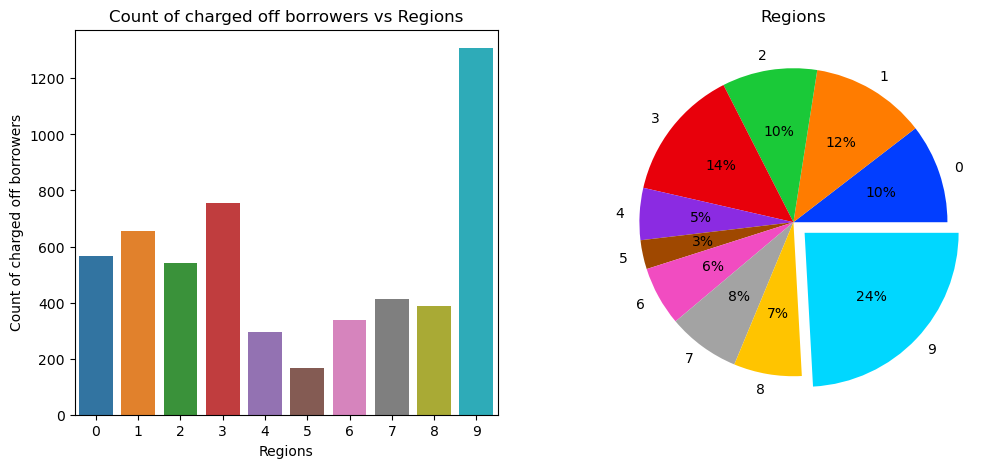

In [107]:
zip_add = loan_data[['zip_code', 'loan_status','zip_region']]
#zip_add['zip_region'] = zip_add.loc[:, 'zip_code'].apply(lambda x : x[:1])
pvt_zip_add =  pd.pivot_table(zip_add, index='zip_region', columns=['loan_status'], aggfunc=len, fill_value=0)
print(pvt_zip_add)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=pvt_zip_add['zip_code']['Charged Off'].index, y=list(pvt_zip_add['zip_code']['Charged Off'].values.flatten()))
plt.xlabel('Regions')
plt.ylabel('Count of charged off borrowers')
plt.title("Count of charged off borrowers vs Regions")


plt.subplot(1,2,2)
# plotting data on piechart 
palette_color = sns.color_palette('bright') 
explode = list(np.zeros(len(pvt_zip_add)))
maxval =pvt_zip_add['zip_code']['Charged Off'].values.flatten().max()

explode[list(pvt_zip_add['zip_code']['Charged Off'].values.flatten()).index(maxval)] = 0.1
plt.pie(list(pvt_zip_add['zip_code']['Charged Off'].values.flatten()), labels=pvt_zip_add['zip_code']['Charged Off'].index, colors=palette_color, autopct='%.0f%%' ,explode=explode)
plt.title("Regions")
plt.show()

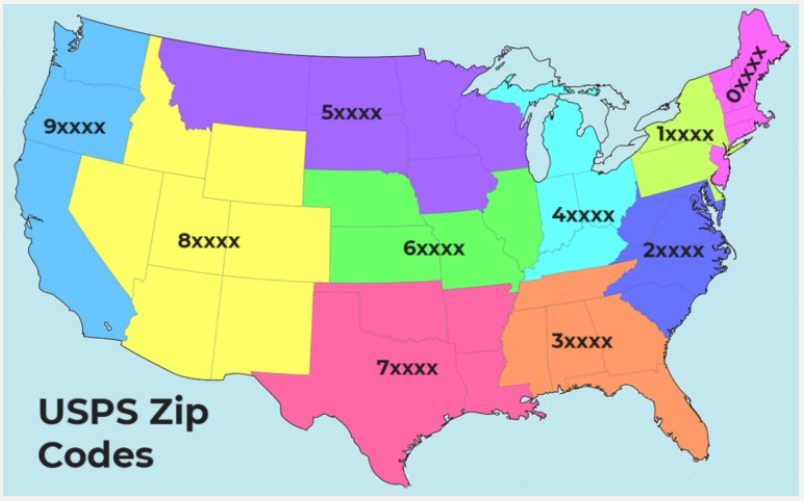


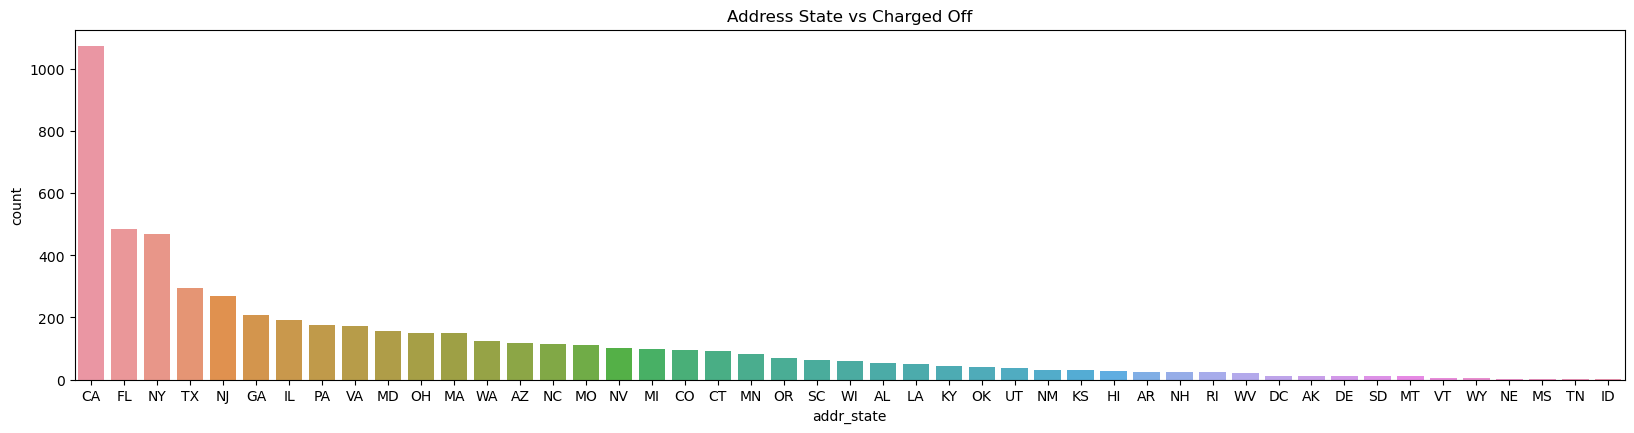

In [108]:
charged_off_df = loan_data[loan_data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')
plt.show()

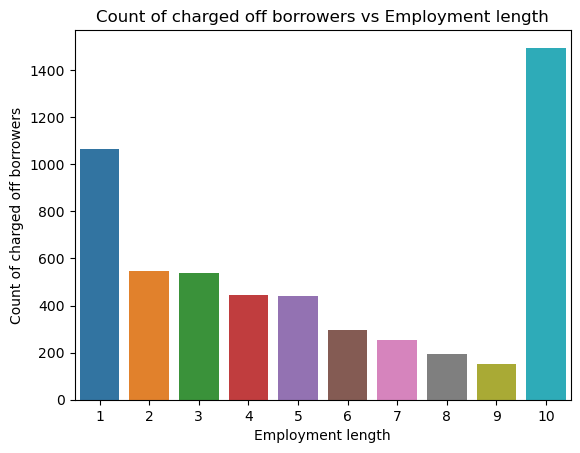

In [109]:
#PS : Analysis on Emp Length and Loan Status
emplen_loanstatus = loan_data[['emp_length', 'loan_status']]
pvt_emplen_loanstatus = pd.pivot_table(emplen_loanstatus, index='emp_length', columns='loan_status', aggfunc=len, fill_value=0)
ChargedOfBorrowers = list(pvt_emplen_loanstatus['Charged Off'].index)
YearsofEmployment = list(pvt_emplen_loanstatus['Charged Off'].values)
sns.barplot(x=ChargedOfBorrowers, y=YearsofEmployment)
plt.xlabel('Employment length')
plt.ylabel('Count of charged off borrowers')
plt.title('Count of charged off borrowers vs Employment length')
plt.show()

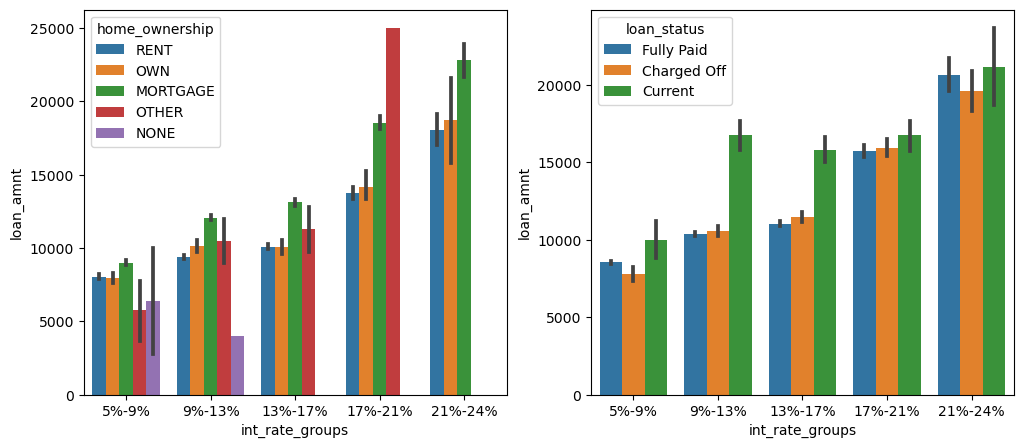

In [110]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=loan_data, x='int_rate_groups', y='loan_amnt', hue='home_ownership')
plt.subplot(1,2,2)
sns.barplot(data=loan_data, x='int_rate_groups', y='loan_amnt', hue='loan_status')
plt.show()

loan_issue_month   Apr   Aug   Dec   Feb   Jan   Jul   Jun   Mar   May   Nov  \
loan_status                                                                    
Charged Off        360   450   657   282   311   457   463   329   453   580   
Current              3   117   206     0     0   117    94     1    71   145   
Fully Paid        2353  2770  3364  1970  1959  2744  2553  2226  2337  3243   

loan_issue_month   Oct   Sep  
loan_status                   
Charged Off        546   533  
Current            160   140  
Fully Paid        2987  2762  


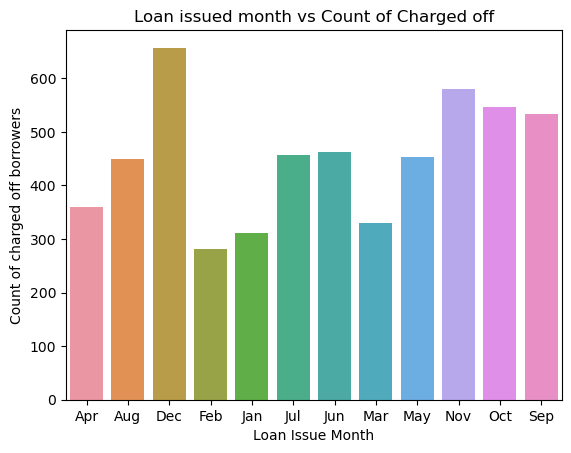

In [111]:

loan_st_issue_d_m = pd.crosstab(loan_data.loan_status, loan_data.loan_issue_month)
loan_st_issue_d_m.loc['Charged Off', :].sort_values(inplace=True)
print(loan_st_issue_d_m)

sns.barplot(x=list(loan_st_issue_d_m.loc['Charged Off', :].index), \
       y=list(loan_st_issue_d_m.loc['Charged Off', :].values.flatten()))
plt.title("Loan issued month vs Count of Charged off")
plt.xlabel("Loan Issue Month")
plt.ylabel("Count of charged off borrowers")
plt.show()

### Correlation Matrix

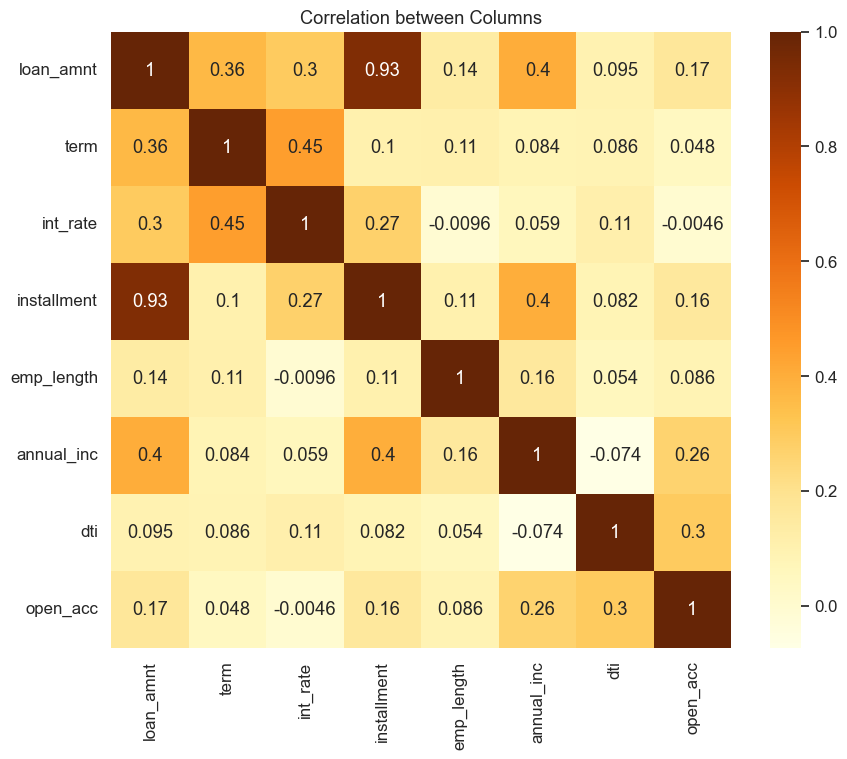

In [112]:
matrix_cols = ['loan_amnt','term','int_rate','installment','emp_length','annual_inc','dti'
               ,'open_acc']
data = loan_data[matrix_cols]
corr_matrix = data.corr()
sns.set(font_scale=1.1)
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_matrix, annot = True, cmap='YlOrBr')
plt.title("Correlation between Columns")
plt.show()

### Multivariate Analysis 

<Figure size 1200x1200 with 0 Axes>

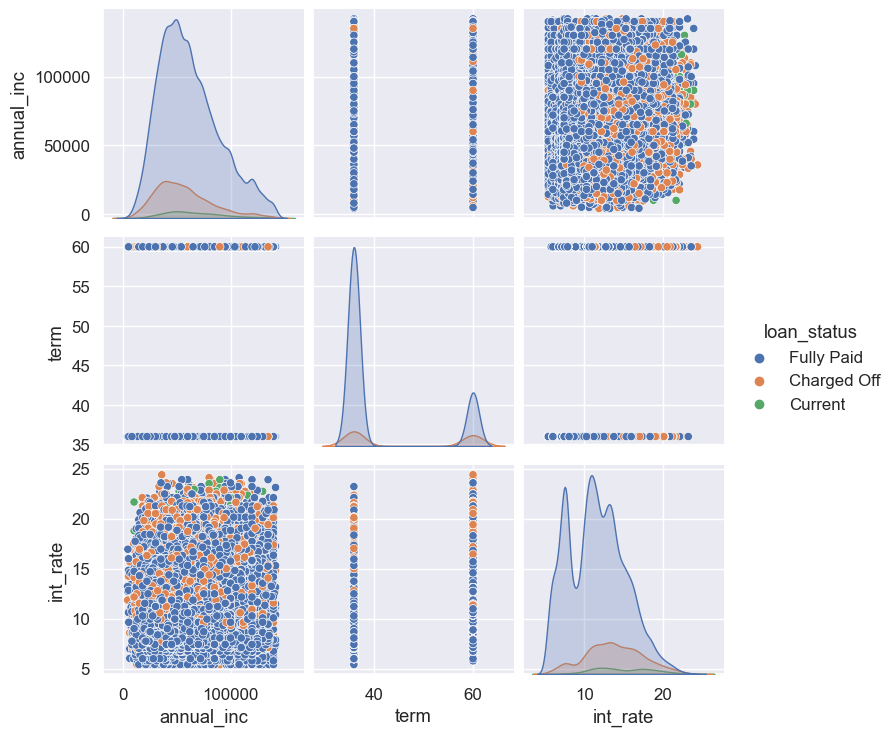

In [113]:
df_ls_ho_t = loan_data[['loan_status','annual_inc', 'term', 'int_rate', 'home_ownership']]

plt.figure(figsize=(12,12))
plt.tight_layout(pad=0)
sns.pairplot(df_ls_ho_t, hue='loan_status')
plt.show()

### Conclusion

-  People with lower annual income borrowing the loan with high interest rate for 36 months term, are more prone to be defaulters <br/>
-  Borrowers with mortgage and rent are more likely to be defaulters because the average annual income is relatively lower for these two categories. <br/>
-  Grades can be a good metric for detecting loan defaulters. The maximum loan defaulters are found to be mostly in grades B, C, D. Therefore lending club should re consider and verify the borrowers who are applying loans for grades B, C and D.<br/>
-  Region 9 has maximum number of loan defaulters, therefore lending club should examine all the borrowers who are applying loans from this region.<br/>
-  Address state CA that falls under region 9 also has the maximum number of loan defaulters. Therefore lending club should control their numbers of loans being approved for this address state.<br/>
-  The maximum number of loan defaulters borrowers have a employment length of only 1 year. <br/>
-  The loan defaulters are maximum in the last quarter of the year, so the lending club should examine and control the loans being sanctioned in the last quarter of the year.<br/>
-  The loan defaulters mostly have open accounts in the range of 5-15. Thus lending club should always verify the loan applicants with more than 5 open accounts.<br/>
-  Negative correlation is observed between DTI and annual income, which means annual income is inversely proportional to DTI. Therefore lending club should be more cautious in granting loans to borrowers who have higher DTI and lower annual income.</br>
